# Netflix Data Exploration Business Case

---
---

## Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import warnings
warnings.filterwarnings('ignore')

---

## Read the data set and store it as a data frame

In [2]:
#Get the current working directory
os.getcwd()

'C:\\Users\\user\\OneDrive\\Desktop\\Scaler DSML\\Business Cases\\Business Case - Netflix Data Exploration and Visualisation'

In [3]:
#Set working directory to desired folder
os.chdir('C:\\Users\\user\\OneDrive\\Desktop\\Scaler DSML\\Business Cases\\Business Case - Netflix Data Exploration and Visualisation')

In [4]:
#Read the data set and store it is as a data frame
data = pd.read_csv("netflix.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


---

## Get a preliminary understanding of the structure of the data

In [5]:
data.head(n=10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
data.tail(n=10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


<ins>Observations</ins>
- Columns such as 'director', 'cast', and country may have multiple comma seperated values.
- Missing (NaN) values are present in the data.

In [7]:
data.shape

(8807, 12)

In [8]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<ins>Observations</ins>
- The 'date_added' column is of object type. It is useful to convert it into the datetime format so that the required date components can be extracted easily from it.

---

## Basic Analysis - Data Preprocessing

### Dropping unwanted columns

In [10]:
data['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

<ins>Observations</ins>
The 'description' contains a paragraph/long sentences summarizing the plot or storyline of a movie or TV show. Since this is highly specific to each show, it does not carry useful information from which insights can be drawn. Hence, this column is dropped.

In [11]:
data.drop(['description'],axis=1,inplace=True)

In [12]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [13]:
data.shape

(8807, 11)

In [14]:
data.reset_index().drop(columns="index",inplace=True)

In [15]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [16]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Renaming the 'listed_in' column to 'genre'

In [17]:
data.rename(columns={'listed_in':'genre'},inplace=True)

In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Seperating the duration column into 2 columns based on type

In [19]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [21]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [22]:
data["duration"].dtype

dtype('O')

In [25]:
#Creating seperate columns for movie length and number of seasons in a show from the duration column
data['movie_length'] = data[data['type']=='Movie']['duration'].apply(lambda x:float(str(x).split(" ")[0]))
data['show_seasons'] = data[data['type']=='TV Show']['duration'].apply(lambda x:float(str(x).split(" ")[0]))

In [26]:
#The original 'duration' column can be dropped
data.drop(['duration'],axis=1,inplace=True)

In [27]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",NaN,2.0


### Handling missing values

In [25]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
genre            object
movie_length    float64
show_seasons    float64
dtype: object

In [26]:
#Get a count of the number of NaN values in each column of the data set
data.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
genre              0
movie_length    2679
show_seasons    6131
dtype: int64

In [27]:
#Dropping all rows where the date_added column has missing values
#It is not meaningful to perform imputation on this columns
#Since there are only 10 such rows, there is hardly any loss of data
data.dropna(subset=["date_added"],inplace=True)

In [28]:
data.shape

(8797, 12)

In [29]:
#Fill the NaN values in the categorical columns with "Unknown column_name"
data.fillna({'director':'Unknown Director', 'cast':'Unknown Actor', 'country':'Unknown Country', 'rating':'Unknown Rating'}, inplace=True)

In [30]:
#Fill the NaN values in the numerical columns with 0
data.fillna({'movie_length':0,'show_seasons':0}, inplace=True)

In [31]:
data.isna().sum(axis=0)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
genre           0
movie_length    0
show_seasons    0
dtype: int64

### Changing the data type of columns where appropriate

In [32]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
genre            object
movie_length    float64
show_seasons    float64
dtype: object

In [33]:
data['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [34]:
#Changing the 'date_added' column to the datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

In [35]:
#Change the 'movie_length' and 'show_seasons' columns to the int type
data[['movie_length','show_seasons']]=data[['movie_length','show_seasons']].astype('int')

In [36]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
genre                   object
movie_length             int32
show_seasons             int32
dtype: object

In [37]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,Documentaries,90,0
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,"Docuseries, Reality TV",0,1
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",0,2


### Un-nesting the columns

In [25]:
data.shape

(8807, 11)

In [39]:
#Converting the comma seperated values in the 'director', 'cast', and 'country' columns 
data['director']=data['director'].apply(lambda x:x.split(", ")).tolist()
data['cast']=data['cast'].apply(lambda x:x.split(", ")).tolist()
data['country']=data['country'].apply(lambda x:x.split(", ")).tolist()

In [40]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown Actor],[United States],2021-09-25,2020,PG-13,Documentaries,90,0
1,s2,TV Show,Blood & Water,[Unknown Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country],2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",0,1
3,s4,TV Show,Jailbirds New Orleans,[Unknown Director],[Unknown Actor],[Unknown Country],2021-09-24,2021,TV-MA,"Docuseries, Reality TV",0,1
4,s5,TV Show,Kota Factory,[Unknown Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",0,2


In [41]:
#Create a function to unnest a data frame over a given column
def unnest(df,col_name):
    return df.explode(column=[col_name],ignore_index=True)

In [42]:
#Unnest over 'director' column
data = unnest(data,"director")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown Actor],[United States],2021-09-25,2020,PG-13,Documentaries,90,0
1,s2,TV Show,Blood & Water,Unknown Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country],2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,[Unknown Actor],[Unknown Country],2021-09-24,2021,TV-MA,"Docuseries, Reality TV",0,1
4,s5,TV Show,Kota Factory,Unknown Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9597,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers",158,0
9598,s8804,TV Show,Zombie Dumb,Unknown Director,[Unknown Actor],[Unknown Country],2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",0,2
9599,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"Comedies, Horror Movies",88,0
9600,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"Children & Family Movies, Comedies",88,0


In [43]:
#Unnest over 'cast' column
data = unnest(data,"cast")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,[United States],2021-09-25,2020,PG-13,Documentaries,90,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
70738,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,[India],2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
70739,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,[India],2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
70740,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,[India],2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
70741,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,[India],2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0


In [44]:
#Unnest over 'country' column
data = unnest(data,"country")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,Documentaries,90,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
89308,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
89309,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
89310,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0
89311,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111,0


### Create a new categorical variable 'age category' based on the 'rating' column

In [45]:
def return_age_category(rating):
    if rating in ('G','TV-Y','TV-G'):
        return 'General'
    elif rating in ('PG','TV-Y7','TV-Y7-FV','TV-PG'):
        return 'Older Kids'
    elif rating in ('PG-13','TV-14'):
        return 'Teenagers'
    elif rating in ('R','NC-17','TV-MA'):
        return 'Adults'
    else:
        return 'Unknown'

In [46]:
data['age_category']=data['rating'].apply(return_age_category)

In [47]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons,age_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,Documentaries,90,0,Teenagers
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults


---

## Non-Graphical & Graphical Analysis of Categorical Columns

In [48]:
#Get a brief description of the categorical columns in the data set
data.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,genre,age_category
count,89313,89313,89313,89313,89313,89313,89313,89313,89313
unique,8797,2,8797,4994,36404,128,18,513,5
top,s7516,Movie,Movie 43,Unknown Director,Unknown Actor,United States,TV-MA,"Dramas, International Movies",Adults
freq,468,65346,468,21868,1190,30435,29846,4255,42766


<ins>Observations</ins>
- The show_id and title columns have 8797 columns indicating that there are 8797 different titles present in the data.
- There are more movies than TV shows released on Netflix.
- Most titles are released in United States, indicating that this is the largest market for the company.
- Most titles are listed in the genre 'Dramas, International Movies', indicating that this could be the most popular category among audiences.

### type

In [49]:
#Get the number of unqiue values of the 'type' column
data['type'].nunique()

2

In [50]:
#Get the unique values of the 'type' column
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [51]:
data['type'].value_counts()

Movie      65346
TV Show    23967
Name: type, dtype: int64

In [52]:
#Get the number of unique movies and TV shows
unique_type_counts=data.groupby("type")["title"].nunique().sort_values(ascending=False)
unique_type_counts

type
Movie      6131
TV Show    2666
Name: title, dtype: int64

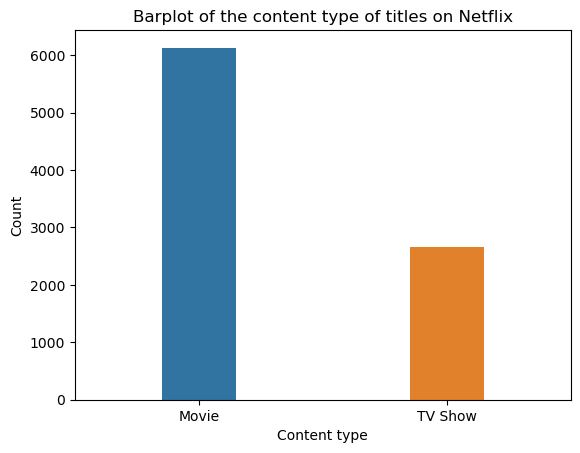

In [53]:
#Barplot of the content type of unique titles on Netflix
sns.barplot(x=unique_type_counts.index,y=unique_type_counts.values,width=0.3)
plt.title("Barplot of the content type of titles on Netflix")
plt.xlabel("Content type")
plt.ylabel("Count")
plt.show()

<ins>Observations</ins>
- According to the data, there are vastly more movies as compared to TV shows present on Netflix. This is not surprising as movies being shorter, are easier to make and generally require lower budgets, as compared to TV shows.

### director

In [54]:
#Get the number of unqiue values of the 'director' column
data['director'].nunique()

4994

In [55]:
#Get the unique values of the 'director' column
data['director'].unique()

array(['Kirsten Johnson', 'Unknown Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [56]:
data['director'].value_counts()

Unknown Director         21868
Martin Scorsese            217
Steven Spielberg           205
Martin Campbell            154
Raja Gosnell               154
                         ...  
Alexx Media                  1
Thomas Toby Parkinson        1
Bruce Gowers                 1
Emma Hatherley               1
Kirsten Johnson              1
Name: director, Length: 4994, dtype: int64

In [57]:
#Identify the top 10 directors who have made the most movies (ignoring unknown director)
top10_directors_m=data[data["type"]=="Movie"].groupby("director")["title"].nunique().sort_values(ascending=False)[1:11]
top10_directors_m

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: title, dtype: int64

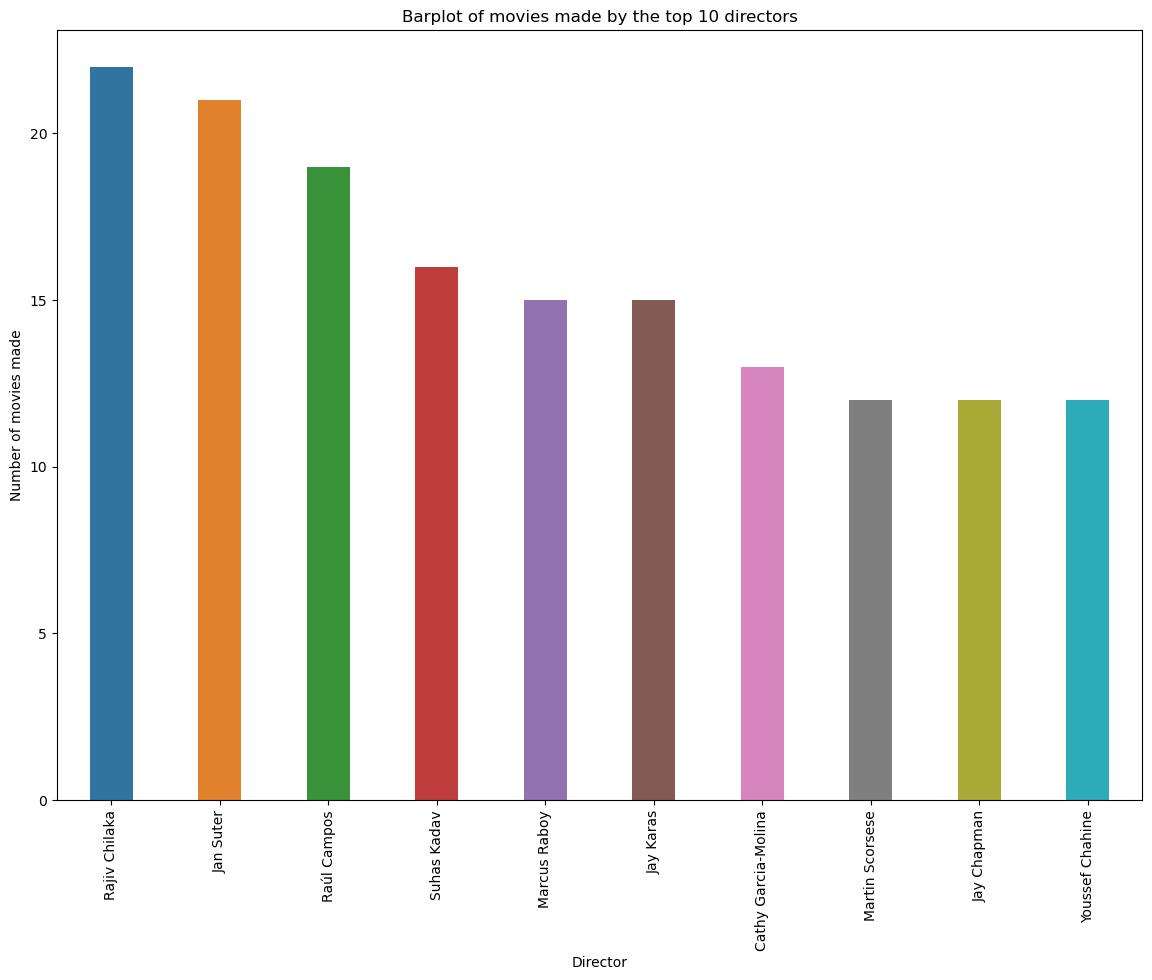

In [58]:
#Barplot of movies made by the top 10 directors
plt.figure(figsize=(14,10))
sns.barplot(x=top10_directors_m.index,y=top10_directors_m.values,width=0.4)
plt.title("Barplot of movies made by the top 10 directors")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Director")
plt.ylabel("Number of movies made")
plt.show()

<ins>Observations</ins>
- A simple background research of the top 10 directors indicates diversity in regions. This is a testament to the company's global presence.

<ins>Actionable insights</ins>
- The diversity in content creators indicates that the company must continue to acquire content from different parts of the world and in multiple languages to help attract a diverse audience of subscribers.
- Knowledge of the top content creators provides an opportunity for direct long-term collaboration with these directors, providing a steady stream of popular content to minimize the risk of customer churn. Such type of collaboration can help reduce the cost of acquisition of distribution rights for movies made by top directors.

In [59]:
#Identify the top 10 directors who have made the most TV shows (ignoring unknown director)
top10_directors_t=data[data["type"]=="TV Show"].groupby("director")["title"].nunique().sort_values(ascending=False)[1:11]
top10_directors_t

director
Ken Burns                3
Alastair Fothergill      3
Stan Lathan              2
Joe Berlinger            2
Hsu Fu-chun              2
Gautham Vasudev Menon    2
Iginio Straffi           2
Lynn Novick              2
Shin Won-ho              2
Rob Seidenglanz          2
Name: title, dtype: int64

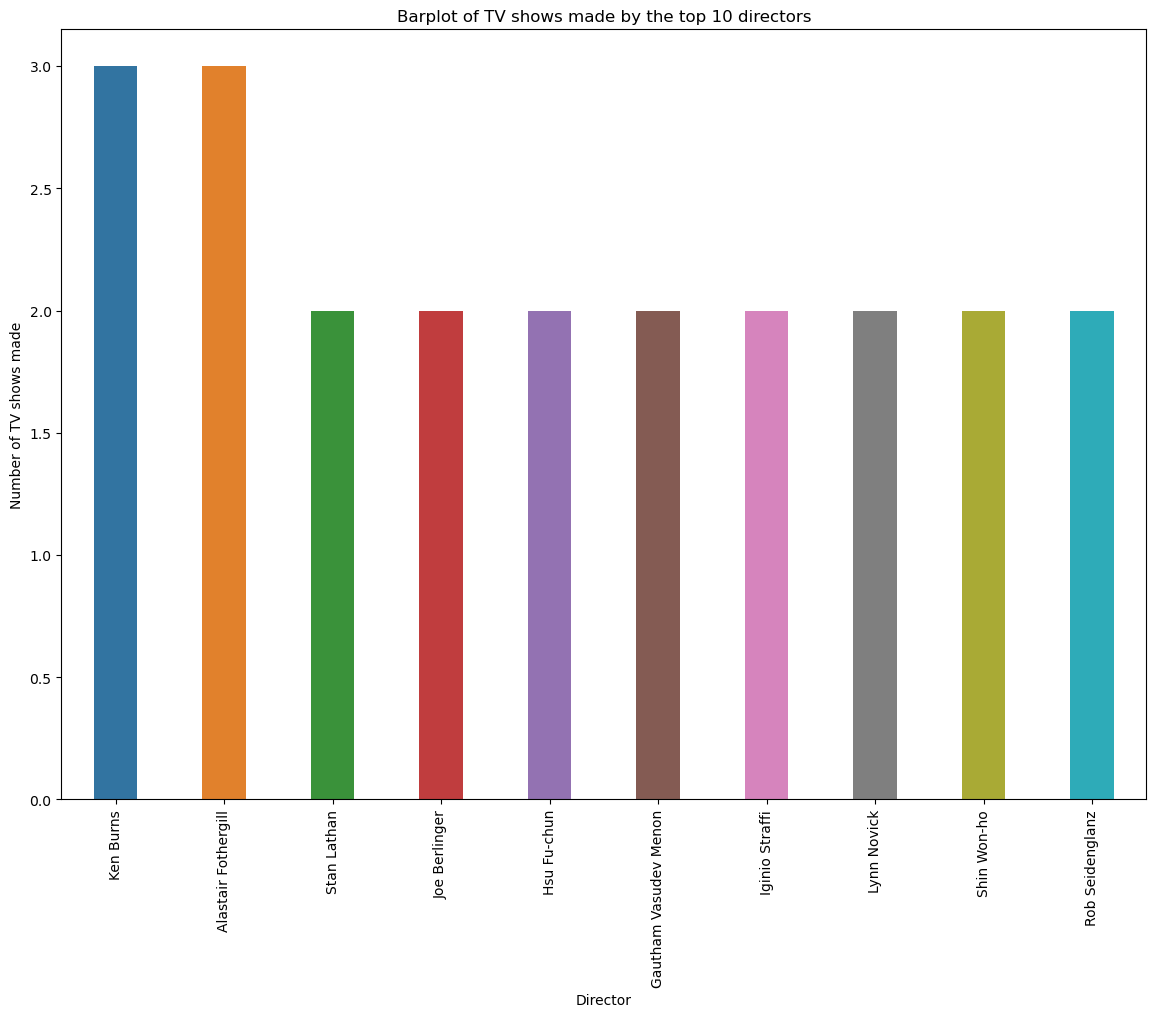

In [60]:
#Barplot of TV shows made by the top 10 directors
plt.figure(figsize=(14,10))
sns.barplot(x=top10_directors_t.index,y=top10_directors_t.values,width=0.4)
plt.title("Barplot of TV shows made by the top 10 directors")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Director")
plt.ylabel("Number of TV shows made")
plt.show()

<ins>Observations</ins>
- As compared to the movies produced by top directors, there is lesser volume in the number of TV shows produced by top directors. This is an indicator of the resource intensive process of creating TV shows.

<ins>Actionable insights</ins>
- The company must brainstorm new strategies and introduce policies to help renowned content creators produce more content. Spin-offs, prequels, and sequels to popular shows are some of the areas that Netflix can invest in as they come with the potential of a readily available dedicated fan base.

### cast

In [61]:
#Get the number of unqiue values of the 'cast' column
data['cast'].nunique()

36404

In [62]:
#Get the unique values of the 'cast' column
data['cast'].unique()

array(['Unknown Actor', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [63]:
#Get the counts of each unique value of the 'cast' column
data['cast'].value_counts()

Unknown Actor            1190
Alfred Molina              85
Liam Neeson                82
John Krasinski             67
Frank Langella             66
                         ... 
Yeo Yann Yann               1
Chia-Chia Peng              1
Fathia Balogun              1
Roxy Antak                  1
Chittaranjan Tripathy       1
Name: cast, Length: 36404, dtype: int64

In [64]:
#Identify the top 10 actors who have appeared in the most movies (ignoring unknown actor)
top10_actors_m=data[data["type"]=="Movie"].groupby("cast")["title"].nunique().sort_values(ascending=False)[1:11]
top10_actors_m

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Paresh Rawal        28
Julie Tejwani       28
Amitabh Bachchan    28
Rupa Bhimani        27
Boman Irani         27
Name: title, dtype: int64

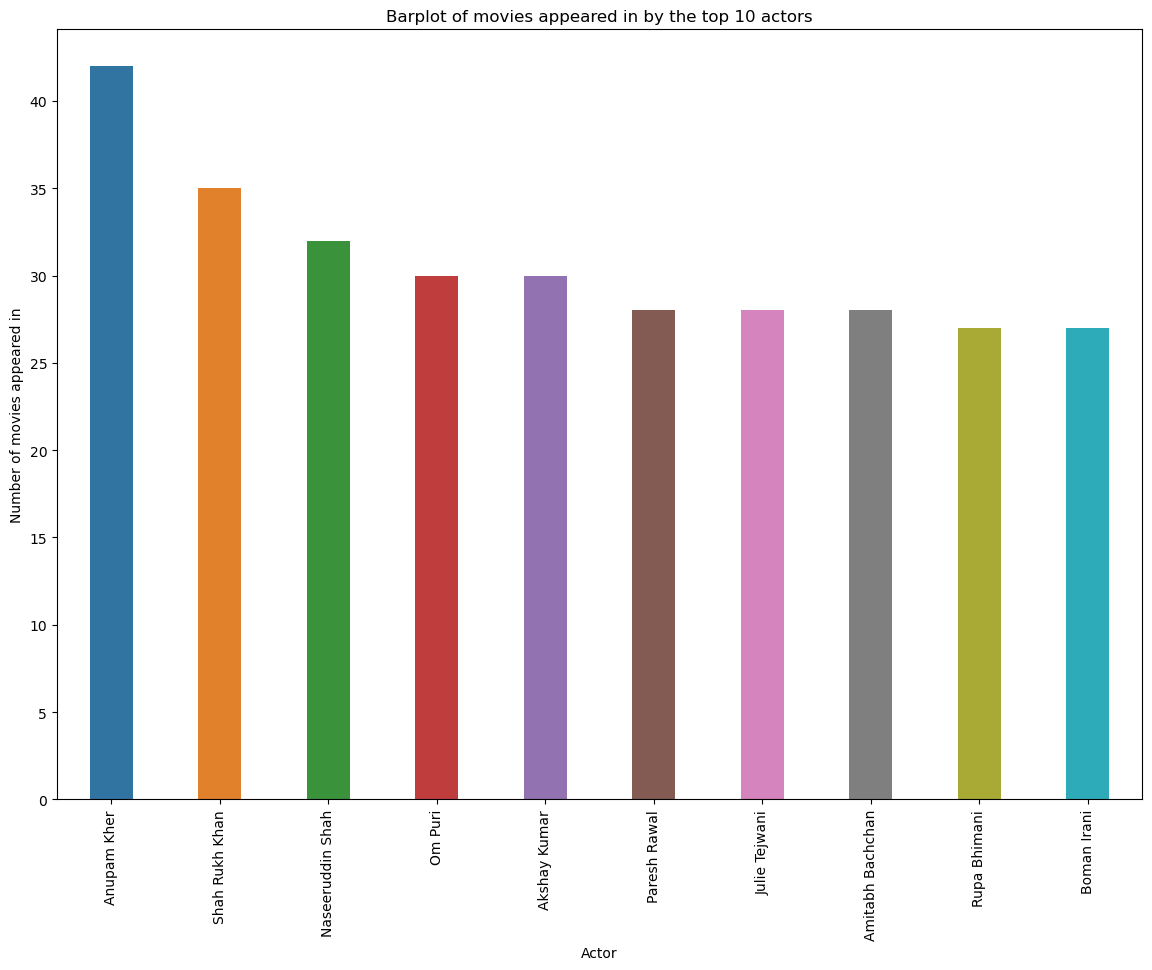

In [65]:
#Barplot of movies appeared in by the top 10 actors
plt.figure(figsize=(14,10))
sns.barplot(x=top10_actors_m.index,y=top10_actors_m.values,width=0.4)
plt.title("Barplot of movies appeared in by the top 10 actors")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Actor")
plt.ylabel("Number of movies appeared in")
plt.show()

<ins>Observations</ins>
- An inspection of the bar chart points to a dominance of veteran Indian actors in Netflix's movie catalogue, showcasing the consistent popularity of content involving these actors.

<ins>Actionable insights</ins>
- Netflix must must consider signing OTT-only content agreements with top actors to attract the huge fanbase of top artists. This has the potential to boost subscriptions, especially in during movies featuring these actors.
- The data provides a strong case for further expanding Netflix's presence in the Indian market.
- There is also a risk of concentration in certain regions. Hence, it is also recommended to diversify in untapped markets where competition is lower.

In [66]:
#Identify the top 10 actors who have appeared in the most TV shows (ignoring unknown actor)
top10_actors_t=data[data["type"]=="TV Show"].groupby("cast")["title"].nunique().sort_values(ascending=False)[1:11]
top10_actors_t

cast
Takahiro Sakurai      25
Yuki Kaji             19
Ai Kayano             17
Junichi Suwabe        17
Daisuke Ono           17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Vincent Tong          13
Name: title, dtype: int64

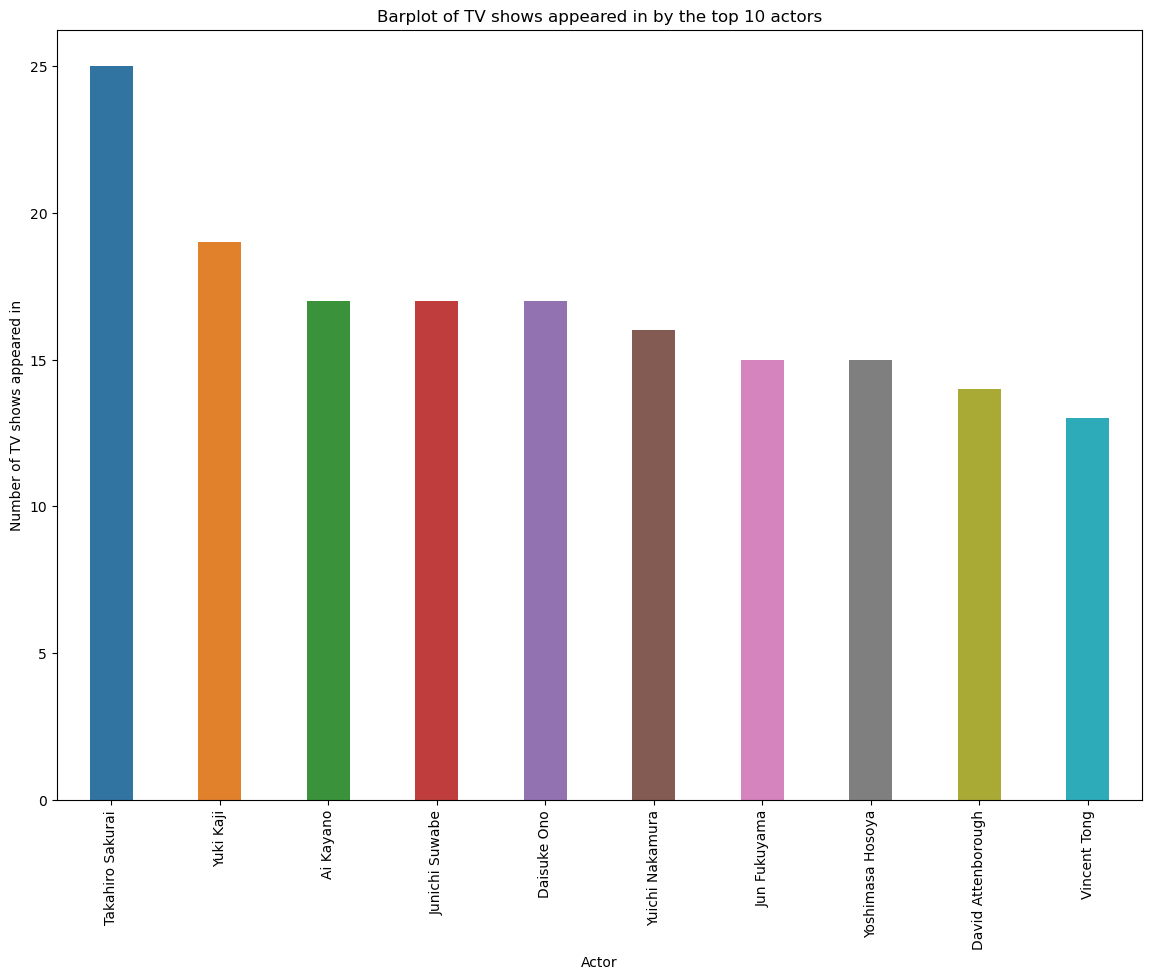

In [67]:
#Barplot of TV shows appeared in by the top 10 actors
plt.figure(figsize=(14,10))
sns.barplot(x=top10_actors_t.index,y=top10_actors_t.values,width=0.4)
plt.title("Barplot of TV shows appeared in by the top 10 actors")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Actor")
plt.ylabel("Number of TV shows appeared in")
plt.show()

<ins>Observations</ins>
- The bar plot suggests a dominance of Japanese actors/voice-actors in Netflix's show catalogue. This is evidence of the global appeal that Japanese anime has.

<ins>Actionable insights</ins>
- The data provides a strong case for continued investment and acquisition of anime content.
- Netflix should consider purchasing exclusive rights for distribution of popular anime shows, which tend to have a dedicated fanbase. The company can use the popularity of these shows in engaging with fans through marketing and social media campaigns. This can help foster a sense of loyalty and keep up the enthusiasm of anime watchers.
- The company can also consider dubbing anime into various regional languages to draw diverse audiences into the anime space.

### country

In [68]:
#Get the number of unqiue values of the 'country' column
data['country'].nunique()

128

In [69]:
#Get the unique values of the 'country' column
data['country'].unique()

array(['United States', 'South Africa', 'Unknown Country', 'India',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Sene

In [70]:
#Get the counts of each unique value of the 'country' column
data['country'].value_counts()

United States      30435
India               8537
United Kingdom      5704
Unknown Country     5420
Canada              3946
                   ...  
Mongolia               1
Armenia                1
Panama                 1
Uganda                 1
Palestine              1
Name: country, Length: 128, dtype: int64

In [71]:
#Find the number of movies produced in each country and pick the top 10 countries (ignoring unknown country)
top10_countries_m=data[(data["type"]=="Movie") & 
                       (data["country"]!="Unknown Country")].groupby("country")["title"].nunique().sort_values(ascending=False)[:10]
top10_countries_m

country
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: title, dtype: int64

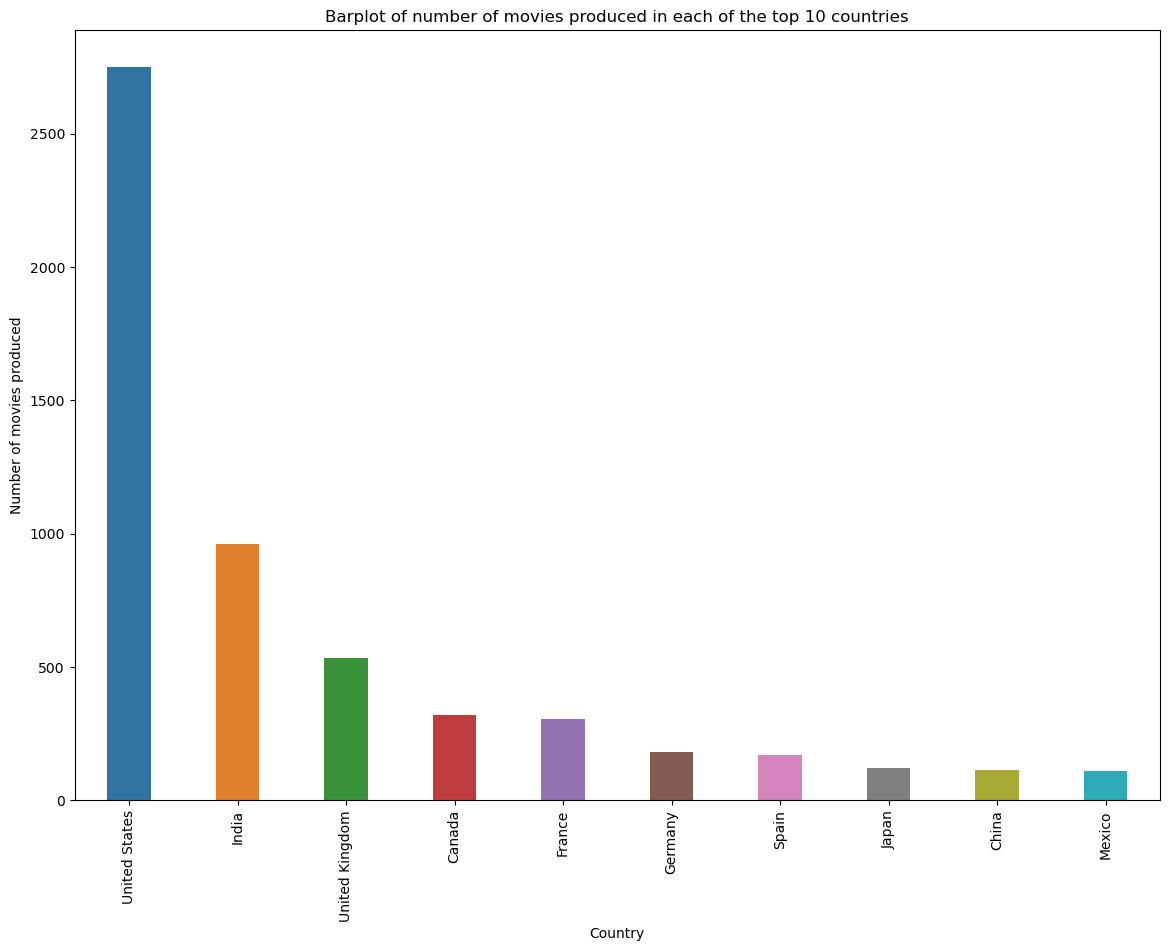

In [72]:
#Barplot of number of movies produced in each of the top 10 countries
plt.figure(figsize=(14,10))
sns.barplot(x=top10_countries_m.index,y=top10_countries_m.values,width=0.4)
plt.title("Barplot of number of movies produced in each of the top 10 countries")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Country")
plt.ylabel("Number of movies produced")
plt.show()

<ins>Observations</ins>
- The US movie catalogue is significantly higher than any of the next 9 top countries.
- There is a lot of diversity in the geographical origin of movies on the platform, from North America, to Europe and Asia.

<ins>Actionable insights</ins>
- Netflix must consider signing collaboration deals with local production houses and filmmakers to further expand its international content library.
- The company must prioritize dubbing and subtitling of popular content to attract viewers from various linguistic backgrounds. 

In [73]:
#Find the number of TV-shows produced in each country and pick the top 10 countries (ignoring unknown country)
top10_countries_t=data[(data["type"]=="TV Show") & 
                       (data["country"]!="Unknown Country")].groupby("country")["title"].nunique().sort_values(ascending=False)[:10]
top10_countries_t

country
United States     932
United Kingdom    271
Japan             198
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          65
Spain              61
Name: title, dtype: int64

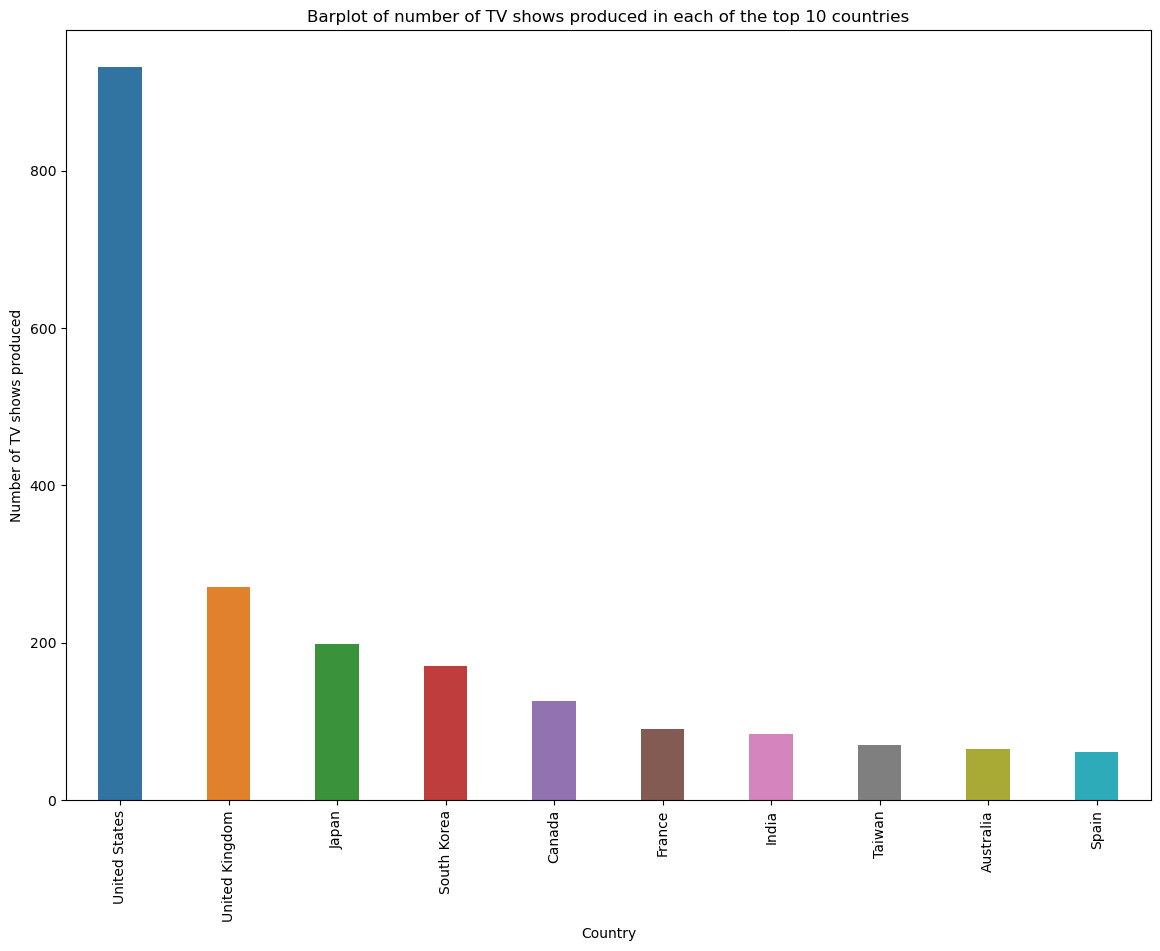

In [74]:
#Barplot of number of Tv shows produced in each of the top 10 countries
plt.figure(figsize=(14,10))
sns.barplot(x=top10_countries_t.index,y=top10_countries_t.values,width=0.4)
plt.title("Barplot of number of TV shows produced in each of the top 10 countries")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Country")
plt.ylabel("Number of TV shows produced")
plt.show()

<ins>Observations</ins>
- The US region also holds a significant lead in terms of the number of TV shows produced on the platform.
- The bar chart also demonstrates the popularity of British TV shows, Japanese anime and K-drama.

<ins>Actionable insights</ins>
- It is recommended to continue investment in good quality show creation from across the globe. Since shows are recurring, it helps retains fans on the platform.
- The company must seek feedback from viewers to try and understand whether its current content library meets their preferences. This helps the company to channelize investments into high demand categories.

### rating & age_category

In [75]:
#Get the number of unqiue values of the 'rating' columns
data['rating'].nunique()

18

In [76]:
#Get the number of unqiue values of the 'rating' columns
data['age_category'].nunique()

5

In [77]:
#Get the unique values of the 'rating' column
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown Rating', 'TV-Y7-FV', 'UR'], dtype=object)

In [78]:
#Get the unique values of the 'age_category' column
data['age_category'].unique()

array(['Teenagers', 'Adults', 'Older Kids', 'General', 'Unknown'],
      dtype=object)

In [79]:
#Get the counts of each unique value of the 'rating' column
data['rating'].value_counts()

TV-MA             29846
TV-14             17405
R                 12865
PG-13              7814
TV-PG              6349
PG                 5182
TV-Y7              4068
TV-Y               2744
TV-G               1329
G                   878
NR                  666
NC-17                55
TV-Y7-FV             39
Unknown Rating       38
UR                   32
74 min                1
84 min                1
66 min                1
Name: rating, dtype: int64

In [80]:
#Get the counts of each unique value of the 'age_category' column
data['age_category'].value_counts()

Adults        42766
Teenagers     25219
Older Kids    15638
General        4951
Unknown         739
Name: age_category, dtype: int64

In [81]:
data_age_subset=data.loc[:,['title','rating','age_category']].drop_duplicates().reset_index().drop(columns='index')
data_age_subset.head()

,title,rating,age_category
0,Dick Johnson Is Dead,PG-13,Teenagers
1,Blood & Water,TV-MA,Adults
2,Ganglands,TV-MA,Adults
3,Jailbirds New Orleans,TV-MA,Adults
4,Kota Factory,TV-MA,Adults


In [82]:
grouped_age_data=data_age_subset[data_age_subset['age_category']!='Unknown'].groupby(["age_category","rating"])["title"].count()
grouped_age_data=grouped_age_data.reset_index()
grouped_age_data.rename(columns={'title':'title_count'},inplace=True)
grouped_age_data

,age_category,rating,title_count
0,Adults,NC-17,3
1,Adults,R,799
2,Adults,TV-MA,3205
3,General,G,41
4,General,TV-G,220
5,General,TV-Y,306
6,Older Kids,PG,287
7,Older Kids,TV-PG,861
8,Older Kids,TV-Y7,333
9,Older Kids,TV-Y7-FV,6


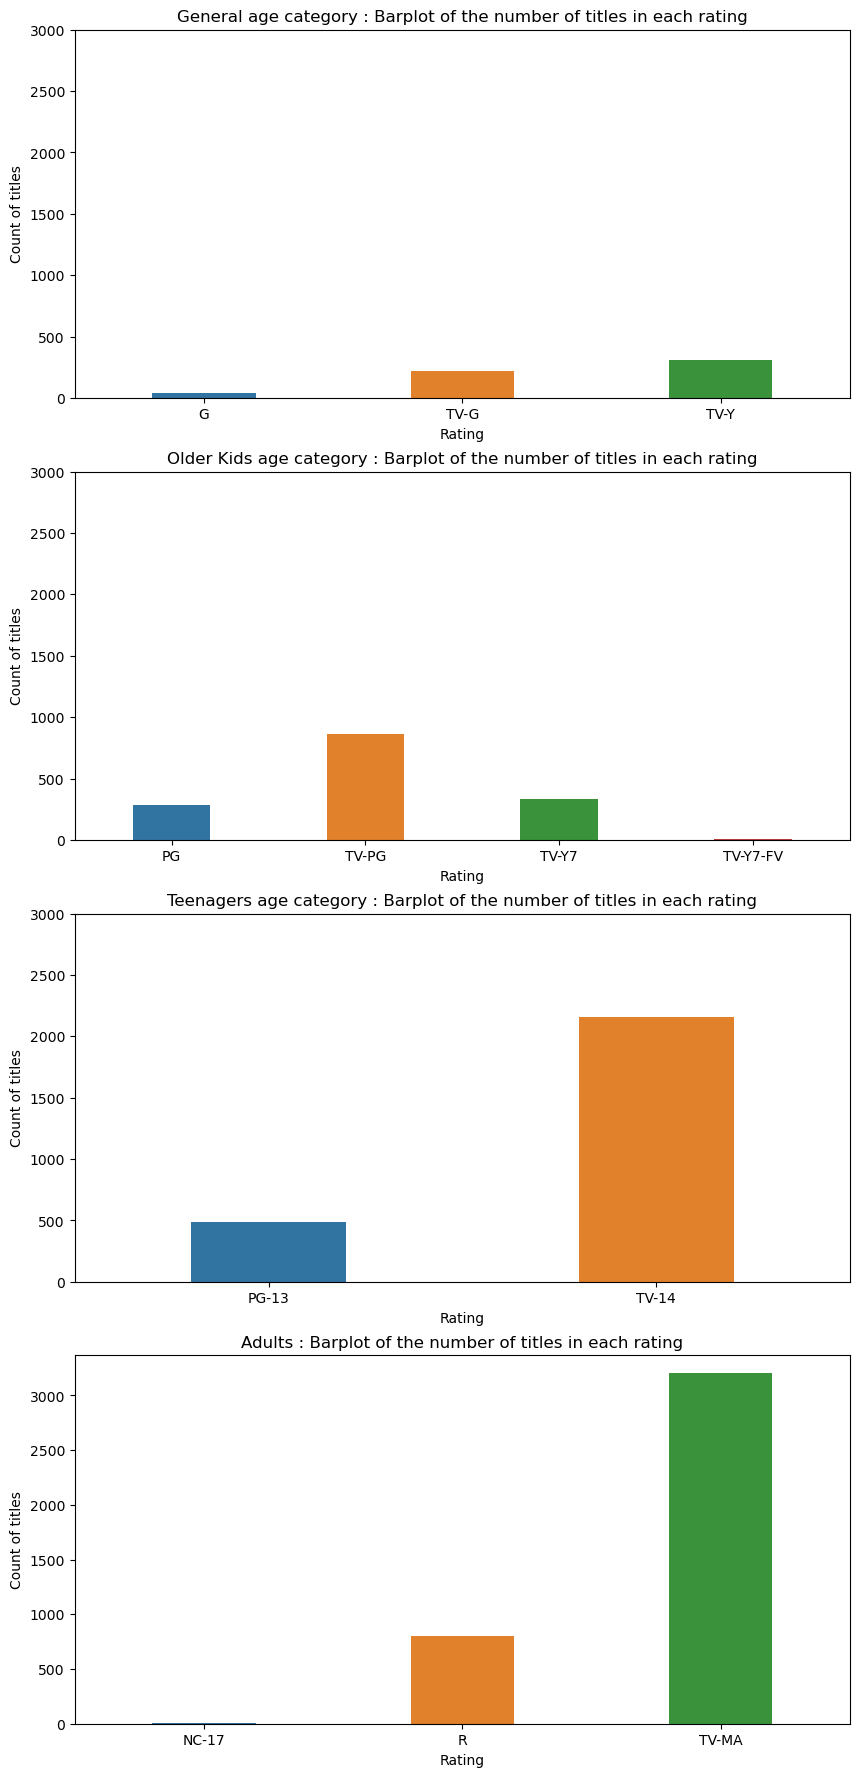

In [83]:
#Comparative barplots of the number of titles in each rating seperated by each age category
plt.figure(figsize=(10,22))

plt.subplot(4,1,1)
sns.barplot(x="rating",y="title_count",data=grouped_age_data[grouped_age_data['age_category']=='General'],width=0.4)
plt.title("General age category : Barplot of the number of titles in each rating")
plt.yticks(range(0,3500,500))
plt.xlabel("Rating")
plt.ylabel("Count of titles")

plt.subplot(4,1,2)
sns.barplot(x="rating",y="title_count",data=grouped_age_data[grouped_age_data['age_category']=='Older Kids'],width=0.4)
plt.title("Older Kids age category : Barplot of the number of titles in each rating")
plt.yticks(range(0,3500,500))
plt.xlabel("Rating")
plt.ylabel("Count of titles")

plt.subplot(4,1,3)
sns.barplot(x="rating",y="title_count",data=grouped_age_data[grouped_age_data['age_category']=='Teenagers'],width=0.4)
plt.title("Teenagers age category : Barplot of the number of titles in each rating")
plt.yticks(range(0,3500,500))
plt.xlabel("Rating")
plt.ylabel("Count of titles")

plt.subplot(4,1,4)
sns.barplot(x="rating",y="title_count",data=grouped_age_data[grouped_age_data['age_category']=='Adults'],width=0.4)
plt.title("Adults : Barplot of the number of titles in each rating")
plt.yticks(range(0,3500,500))
plt.xlabel("Rating")
plt.ylabel("Count of titles")


plt.show()

<ins>Observations</ins>
- There are a large number of titles in the TV-MA and TV-14 rating.
- In general, here is more content on Netflix targeted towards the adult and teenage groups.

<ins>Actionable insights</ins>
- Netflix must consider expanding its content library to include more titles that are suitable for kids, as access to digital technology is on the rise and the use of the internet for both education and entertainment is poised to grow in the coming years.

### genre

In [84]:
genre_data_m=data[data['type']=="Movie"].loc[:,["title","type","genre"]].drop_duplicates().reset_index().drop(columns='index')
genre_data_m.head()

,title,type,genre
0,Dick Johnson Is Dead,Movie,Documentaries
1,My Little Pony: A New Generation,Movie,Children & Family Movies
2,Sankofa,Movie,"Dramas, Independent Movies, International Movies"
3,The Starling,Movie,"Comedies, Dramas"
4,Je Suis Karl,Movie,"Dramas, International Movies"


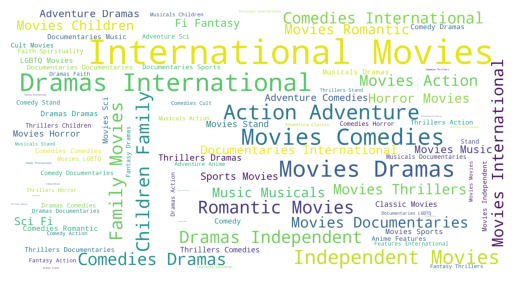

In [85]:
#Analyzing popularity of genres across movies using wordcloud
wordcloud = WordCloud(
    background_color='white',
    width=1900,
    height=1000).generate(" ".join(genre_data_m["genre"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<ins>Observations</ins>
- The most popular types of movie content on Netflix appear to be internationally acclaimed movies. The genres with the most titles include dramas, comedies, action and adventure.
- There is a significantly low percentage of content in the thriller, horror and documentary space.

<ins>Actionable insights</ins>
- The huge catalogue of internationally acclaimed movies and shows is an indicator that Netflix must prioritize acquiring the rights for the most highly rated content.
- Investments for both acquisition as well original creations can be targeted towards drama, action and comedy genres.
- Further market research can be conducted to understand the preferences of content across various demographics.

In [86]:
genre_data_t=data[data['type']=="TV Show"].loc[:,["title","type","genre"]].drop_duplicates().reset_index().drop(columns='index')
genre_data_t.head()

,title,type,genre
0,Blood & Water,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
1,Ganglands,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
2,Jailbirds New Orleans,TV Show,"Docuseries, Reality TV"
3,Kota Factory,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
4,Midnight Mass,TV Show,"TV Dramas, TV Horror, TV Mysteries"


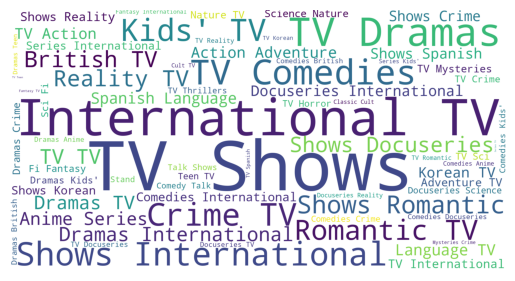

In [87]:
#Analyzing popularity of genres across TV shows using wordcloud
wordcloud = WordCloud(
    background_color='white',
    width=1900,
    height=1000).generate(" ".join(genre_data_t["genre"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<ins>Observations</ins>
- Netflix's TV show catalogue has a large percentage of international TV shows in the drama and comedy genres.
- There are very titles in the crime, nature and science fiction departments.

<ins>Actionable insights</ins>
- The company must boost acquisition of internationally acclaimed TV shows and invest on developing new content in the drama and comedy genres, which are quite popular.
- The company must always ensure a diverse catalogue of shows in different genres and in different languages to cater to Netflix's expanding audience.

---

## Non-Graphical & Graphical Analysis of Numerical Columns

In [88]:
#Get a brief description of the numerical columns in the data set
data.describe()

,release_year,movie_length,show_seasons
count,89313.000000,89313.000000,89313.000000
mean,2013.453394,76.456753,0.526732
std,8.786106,51.126687,1.280707
min,1925.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000
50%,2016.000000,94.000000,0.000000
75%,2019.000000,110.000000,1.000000
max,2021.000000,312.000000,17.000000


### movie_length

In [89]:
#Get a description of the numerical summary measures for the length (in minutes) of all movies in the dataset
data[data['type']=="Movie"].loc[:,'movie_length'].describe()

count    65346.000000
mean       104.498852
std         25.342787
min          0.000000
25%         91.000000
50%        102.000000
75%        117.000000
max        312.000000
Name: movie_length, dtype: float64

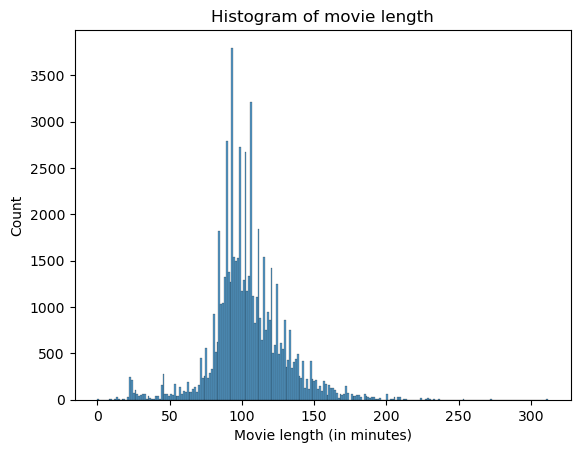

In [90]:
#Histogram of movie length
sns.histplot(x=data[data['type']=="Movie"].loc[:,'movie_length'])
plt.title("Histogram of movie length")
plt.xlabel("Movie length (in minutes)")
plt.ylabel("Count")
plt.show()

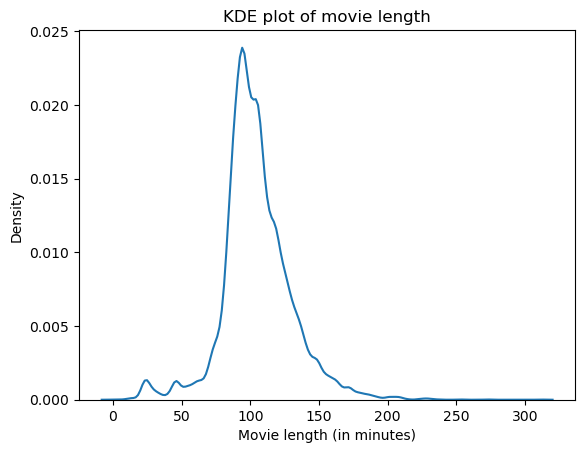

In [91]:
#KDE plot of movie length
sns.kdeplot(x=data[data['type']=="Movie"].loc[:,'movie_length'])
plt.title("KDE plot of movie length")
plt.xlabel("Movie length (in minutes)")
plt.show()

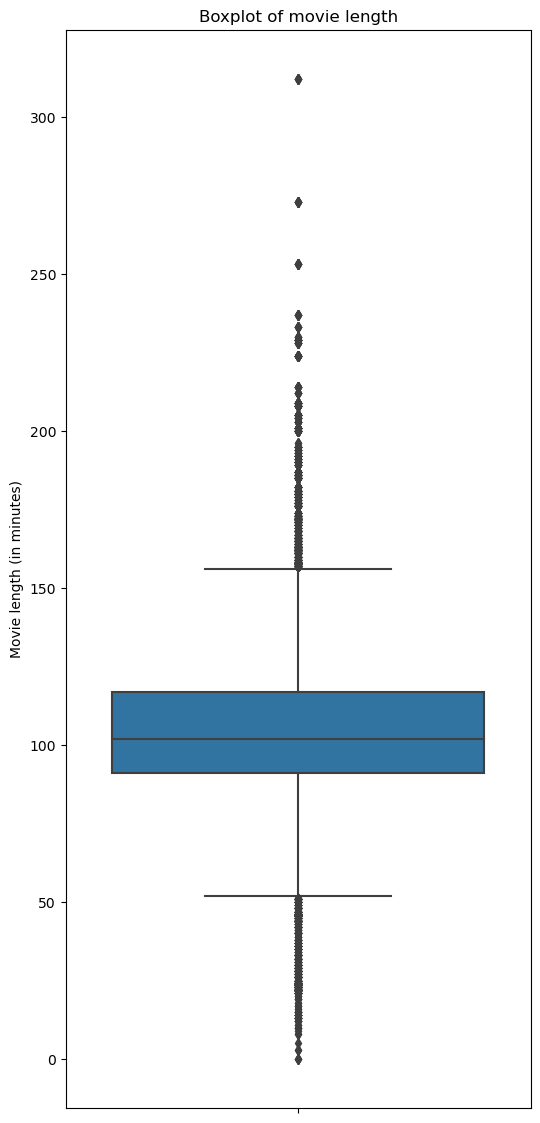

In [92]:
#Boxplot of movie length
plt.figure(figsize=(6,14))
sns.boxplot(y=data[data['type']=="Movie"].loc[:,'movie_length'])
plt.title("Boxplot of movie length")
plt.ylabel("Movie length (in minutes)")
plt.show()

<ins>Observations</ins>
- All three plots indicate that the distribution of movie durations is fairly symmetrical with a slight positive skew.
- The median and mode of the movie duration is around 100 minutes.
- There are outliers on both sides, which is an indicator that the Netflix catalogue has a wide array of movies ranging from short films to feature films and long duration documentaries and movies.

### show_seasons

In [93]:
#Get a description of the numerical summary measures for the number of seasons of all TV shows in the dataset
data[data['type']=="TV Show"].loc[:,'show_seasons'].describe()

count    23967.000000
mean         1.962866
std          1.814765
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: show_seasons, dtype: float64

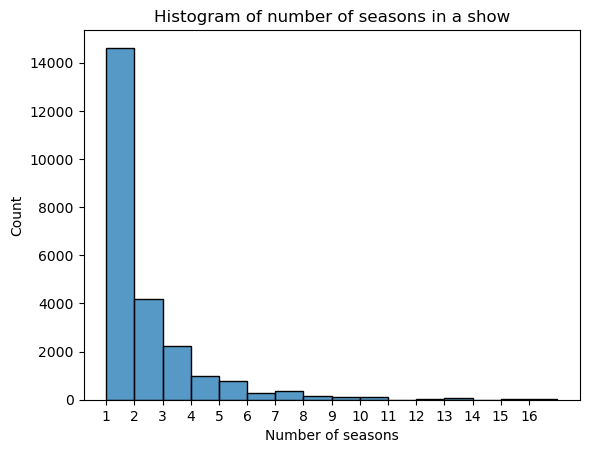

In [94]:
#Histogram of number of seasons in a show
sns.histplot(x=data[data['type']=="TV Show"].loc[:,'show_seasons'],binwidth=1)
plt.title("Histogram of number of seasons in a show")
plt.xticks(range(1, 17))
plt.xlabel("Number of seasons")
plt.ylabel("Count")
plt.show()

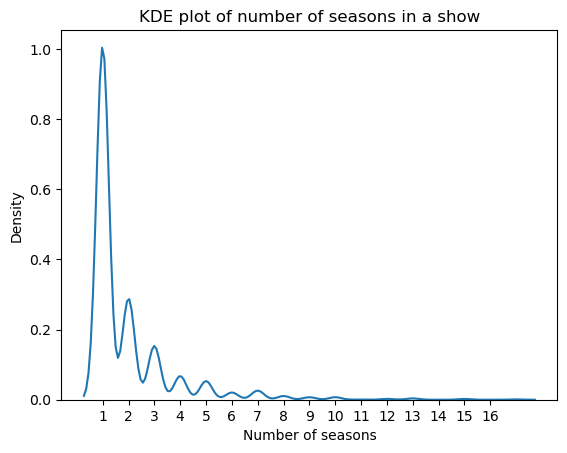

In [95]:
#KDE plot of number of seasons in a show
sns.kdeplot(x=data[data['type']=="TV Show"].loc[:,'show_seasons'])
plt.title("KDE plot of number of seasons in a show")
plt.xticks(range(1, 17))
plt.xlabel("Number of seasons")
plt.show()

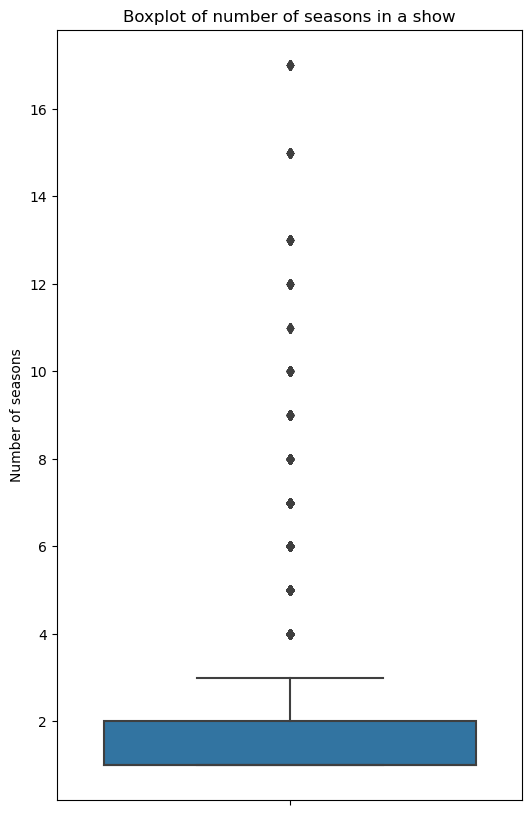

In [96]:
#Boxplot of number of seasons in a show
plt.figure(figsize=(6,10))
sns.boxplot(y=data[data['type']=="TV Show"].loc[:,'show_seasons'])
plt.title("Boxplot of number of seasons in a show")
plt.ylabel("Number of seasons")
plt.show()

<ins>Observations</ins>
- All three plots demonstrate the nature of the distribution of the number of seasons for TV shows is extremely right-skewed.
- The median and mode are at the lowest possible value of 1 season, with outliers present at higher values, indicating that it is an exception more than a norm for shows on the platform to extend for multiple seasons.

<ins>Actionable insights</ins>
- Thorough research must be carried out to understand why only a few shows make it past the first season and even fewer extend for multiple seasons. The company should identify the common factor behind the success of multi-season shows.
- Netflix should consider signing multi-year contracts with production houses and actors to boost the rate of multi-season shows.

---

## Non-Graphical & Graphical Analysis of Datetime Columns

In [97]:
data["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [98]:
#From the date_added column, extract three columns for week, month and year
data["year_added"]=data["date_added"].dt.year
data["month_added"]=data["date_added"].dt.month_name()
data["week_added"]=data["date_added"].dt.week

In [99]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,movie_length,show_seasons,age_category,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,Documentaries,90,0,Teenagers,2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults,2021,September,38
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults,2021,September,38
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults,2021,September,38
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,2,Adults,2021,September,38


### Best week

In [100]:
#Find which is the best week to release a movie
top10_weeks_m=data[(data["type"]=="Movie")].groupby("week_added")["title"].nunique().sort_values(ascending=False)[:10]
top10_weeks_m

week_added
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
Name: title, dtype: int64

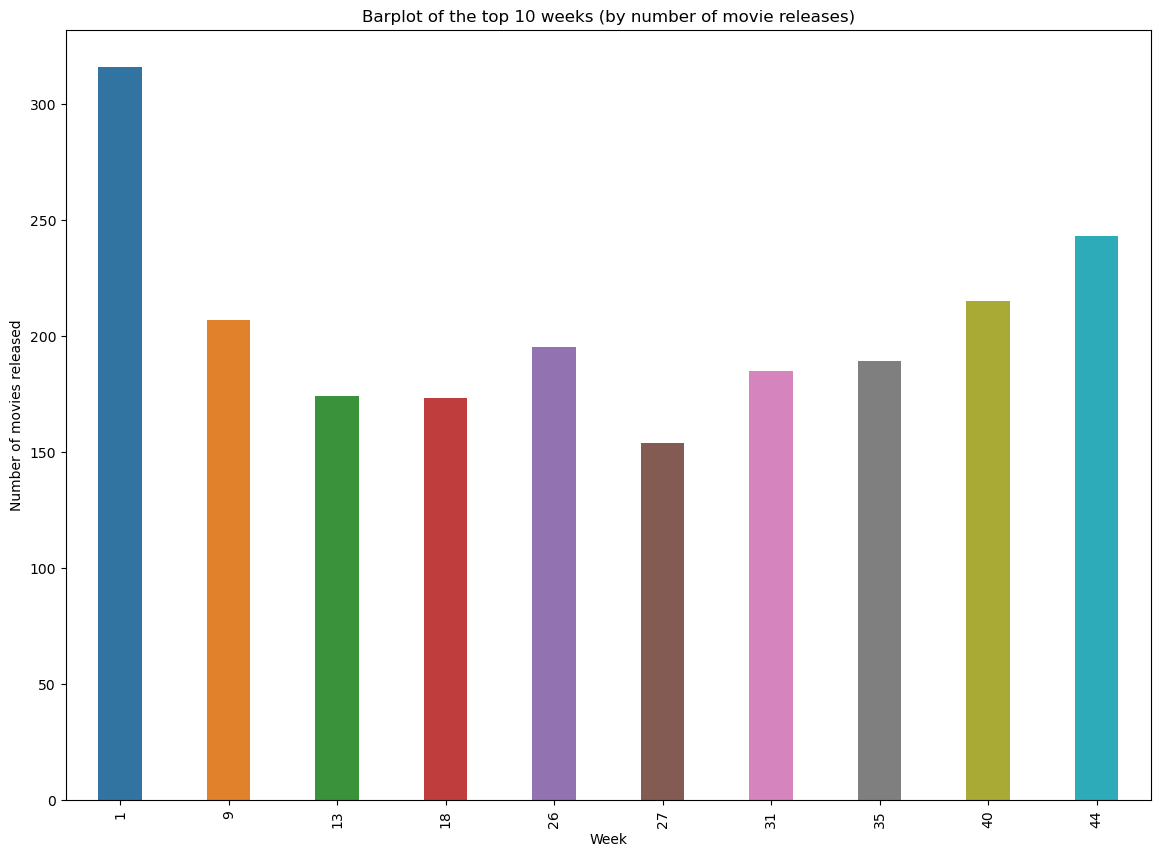

In [101]:
#Barplot of the top 10 weeks (by number of movie releases)
plt.figure(figsize=(14,10))
sns.barplot(x=top10_weeks_m.index,y=top10_weeks_m.values,width=0.4)
plt.title("Barplot of the top 10 weeks (by number of movie releases)")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Week")
plt.ylabel("Number of movies released")
plt.show()

<ins>Observations</ins>
- The standout weeks for releasing movie content on Netflix appears to be the 1st week of the year and the 44th week (around Halloween).

<ins>Actionable insights</ins>
- The company can make use of the holiday season to release new content. This can potentially lead to wider target audience for movies.

In [102]:
#Find which is the best week to release a TV show
top10_weeks_t=data[(data["type"]=="TV Show")].groupby("week_added")["title"].nunique().sort_values(ascending=False)[:10]
top10_weeks_t

week_added
27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
Name: title, dtype: int64

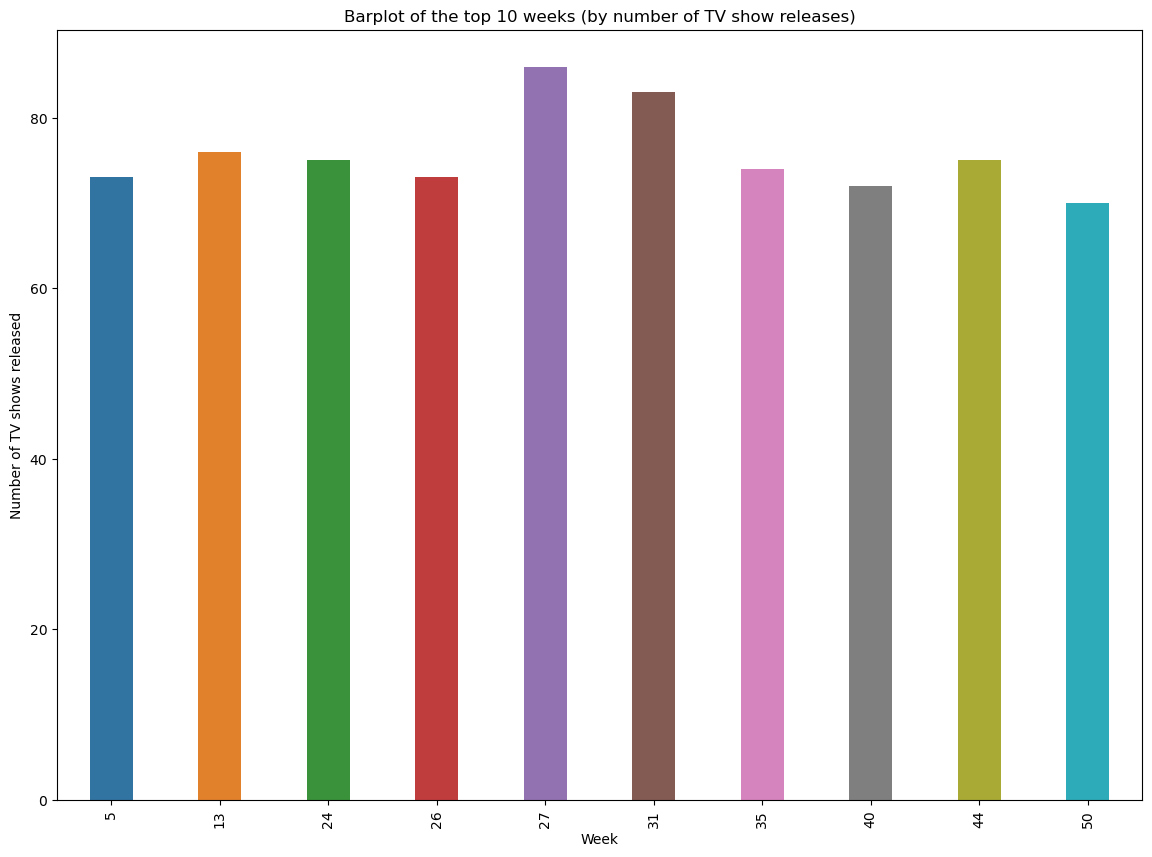

In [103]:
#Barplot of the top 10 weeks (by number of TV show releases)
plt.figure(figsize=(14,10))
sns.barplot(x=top10_weeks_t.index,y=top10_weeks_t.values,width=0.4)
plt.title("Barplot of the top 10 weeks (by number of TV show releases)")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Week")
plt.ylabel("Number of TV shows released")
plt.show()

<ins>Observations</ins>
- The standout weeks for releasing TV show content on Netflix appears to be the 27th week (around 4th of July) and 31st week (beginning of August). This is an indicator that summer is a good time to release new shows.

<ins>Actionable insights</ins>
- The company plan releases to align with the summer vacation season for schools and colleges. This can help to boost the viewership numbers of TV shows on the platform.

### Best month

In [104]:
#Find which is the best month to release a movie
month_order_dict={"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
  "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
months_m=data[(data["type"]=="Movie")].groupby("month_added")["title"].nunique().sort_index(
    key=lambda x: x.map(month_order_dict))
months_m

month_added
January      546
February     382
March        529
April        550
May          439
June         492
July         565
August       519
September    519
October      545
November     498
December     547
Name: title, dtype: int64

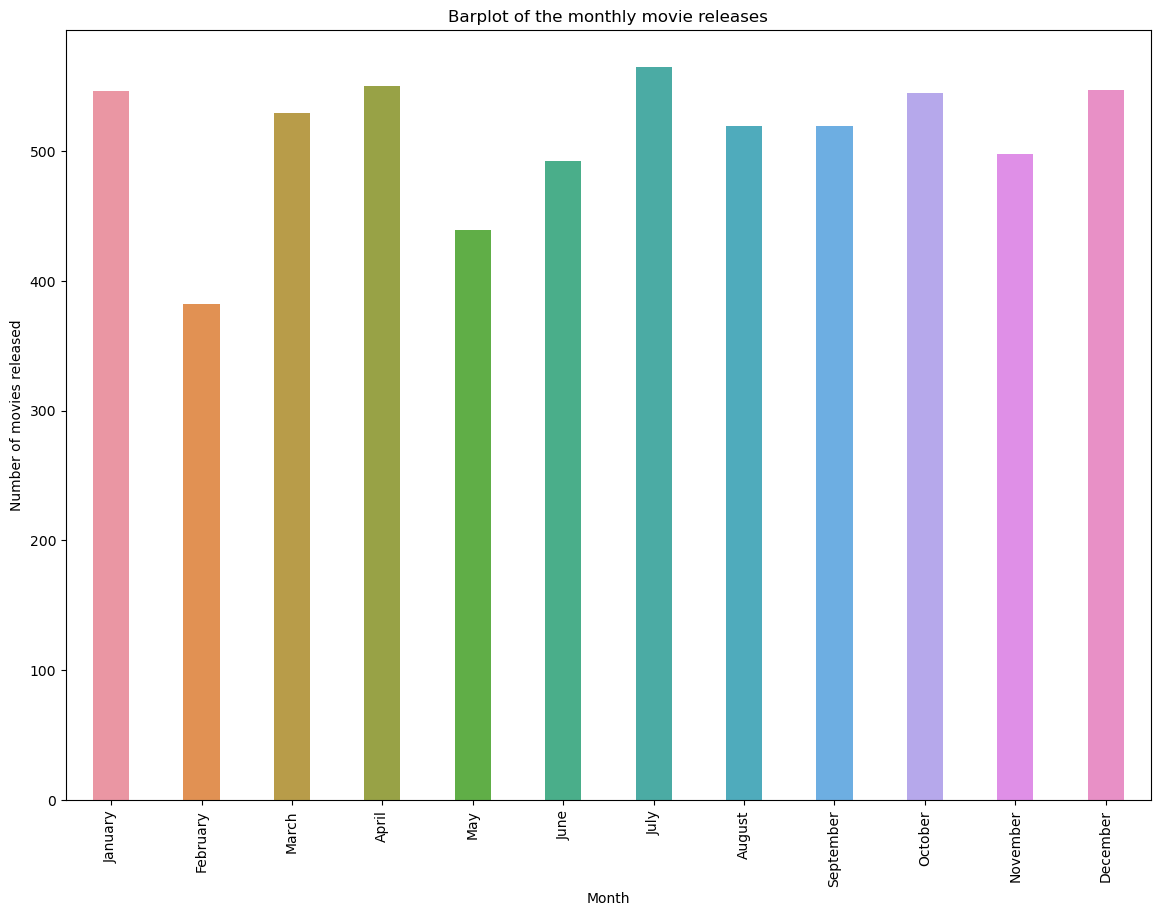

In [105]:
#Barplot of the monthly movie releases
plt.figure(figsize=(14,10))
sns.barplot(x=months_m.index,y=months_m,width=0.4)
plt.title("Barplot of the monthly movie releases")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Month")
plt.ylabel("Number of movies released")
plt.show()

<ins>Observations</ins>
- The holiday seasons of January, July and December appear to most popular release time frames for new movies on Netflix.

<ins>Actionable insights</ins>
- The company must explore marketing strategies to help attract viewers to new releases even in non-peak seasons. This helps to prevent overwhelming the audience with content during the limited holiday window.

In [106]:
#Find which is the best month to release a TV show
months_t=data[(data["type"]=="TV Show")].groupby("month_added")["title"].nunique().sort_index(
    key=lambda x: x.map(month_order_dict))
months_t

month_added
January      192
February     181
March        213
April        214
May          193
June         236
July         262
August       236
September    251
October      215
November     207
December     266
Name: title, dtype: int64

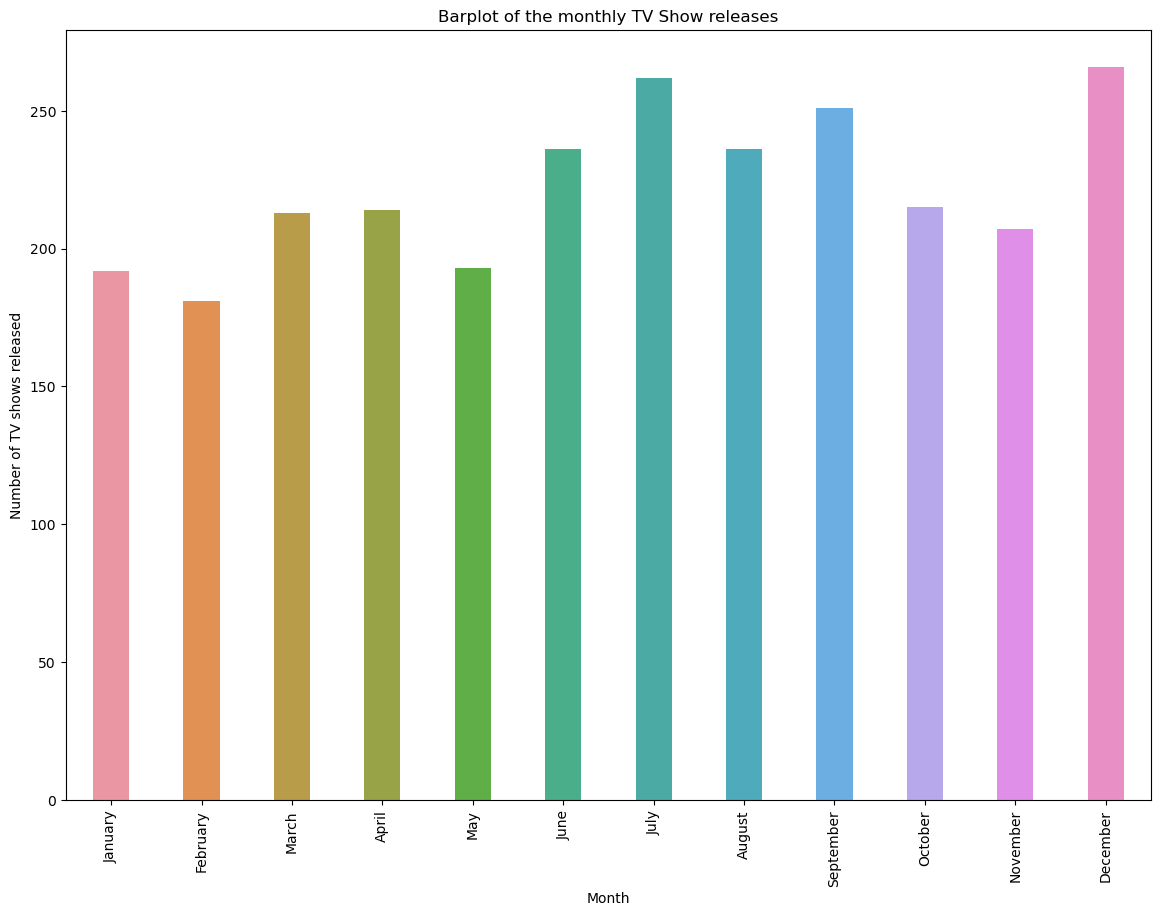

In [107]:
#Barplot of the monthly TV releases
plt.figure(figsize=(14,10))
sns.barplot(x=months_t.index,y=months_t,width=0.4)
plt.title("Barplot of the monthly TV Show releases")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Month")
plt.ylabel("Number of TV shows released")
plt.show()

<ins>Observations</ins>
- For shows, it appears the summer vacations of July and the winter holidays of December appear to be the most popular release windows.

<ins>Actionable insights</ins>
- Netflix must ensure that new seasons of the same show are released during the same times each year to ensure uniformity for the viewers.

### Analysis of time difference between initial release and Netflix release of movies and TV shows

In [108]:
#Find after how many days the movie will be added to Netflix after the release of the movie

In [109]:
#Extract only non-duplicate rows 
data_subset=data[["title","type","release_year","year_added"]].drop_duplicates().reset_index().drop(columns='index')
data_subset.head()

,title,type,release_year,year_added
0,Dick Johnson Is Dead,Movie,2020,2021
1,Blood & Water,TV Show,2021,2021
2,Ganglands,TV Show,2021,2021
3,Jailbirds New Orleans,TV Show,2021,2021
4,Kota Factory,TV Show,2021,2021


In [110]:
#Calculate the number of days from initial release to date of addition on the platform
data_subset["days_to_addition"]=(data_subset["year_added"]-data_subset["release_year"])*365
data_subset.head()

,title,type,release_year,year_added,days_to_addition
0,Dick Johnson Is Dead,Movie,2020,2021,365
1,Blood & Water,TV Show,2021,2021,0
2,Ganglands,TV Show,2021,2021,0
3,Jailbirds New Orleans,TV Show,2021,2021,0
4,Kota Factory,TV Show,2021,2021,0


In [111]:
#Get a description of the numerical summary measures for 'days_to_addition' column
data_subset.loc[:,'days_to_addition'].describe()

count     8797.000000
mean      1711.272025
std       3207.254405
min      -1095.000000
25%          0.000000
50%        365.000000
75%       1825.000000
max      33945.000000
Name: days_to_addition, dtype: float64

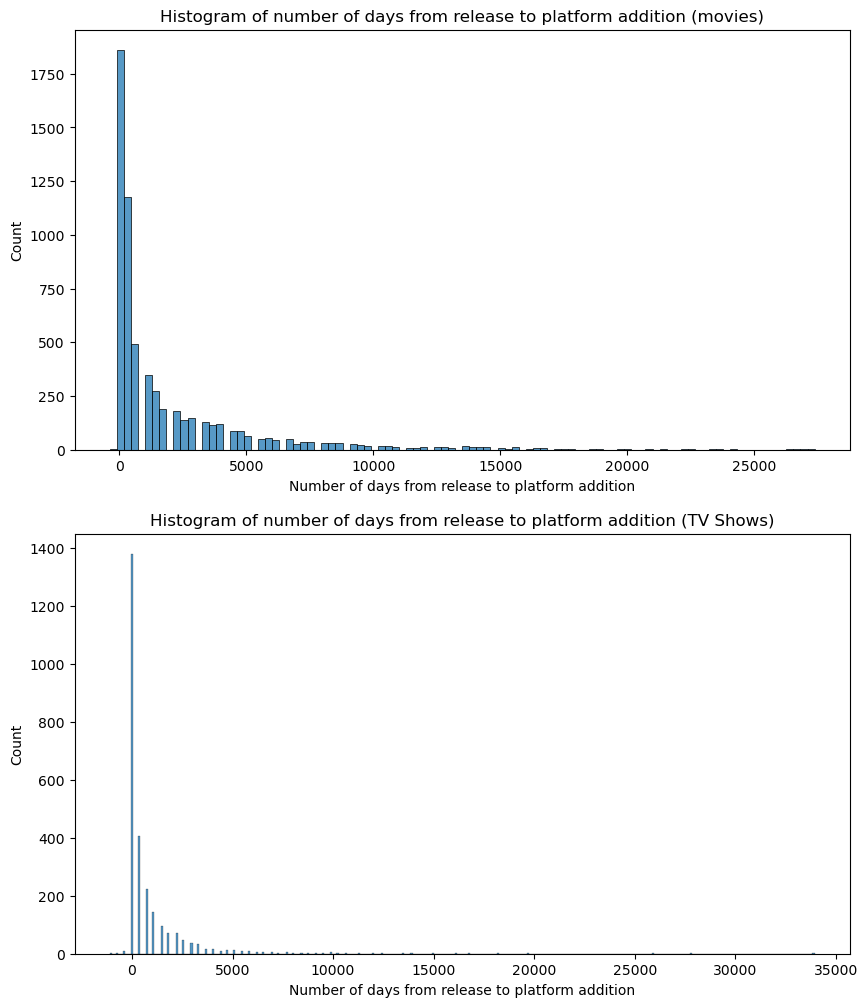

In [112]:
#Histograms comparing the distribution of the number of days it takes a movie or TV show to be added to the 
#platform from its original release date
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
sns.histplot(x=data_subset[data_subset['type']=="Movie"].loc[:,'days_to_addition'])
plt.title("Histogram of number of days from release to platform addition (movies)")
plt.xlabel("Number of days from release to platform addition")
plt.ylabel("Count")

plt.subplot(2,1,2)
sns.histplot(x=data_subset[data_subset['type']=="TV Show"].loc[:,'days_to_addition'])
plt.title("Histogram of number of days from release to platform addition (TV Shows)")
plt.xlabel("Number of days from release to platform addition")
plt.ylabel("Count")

plt.show()

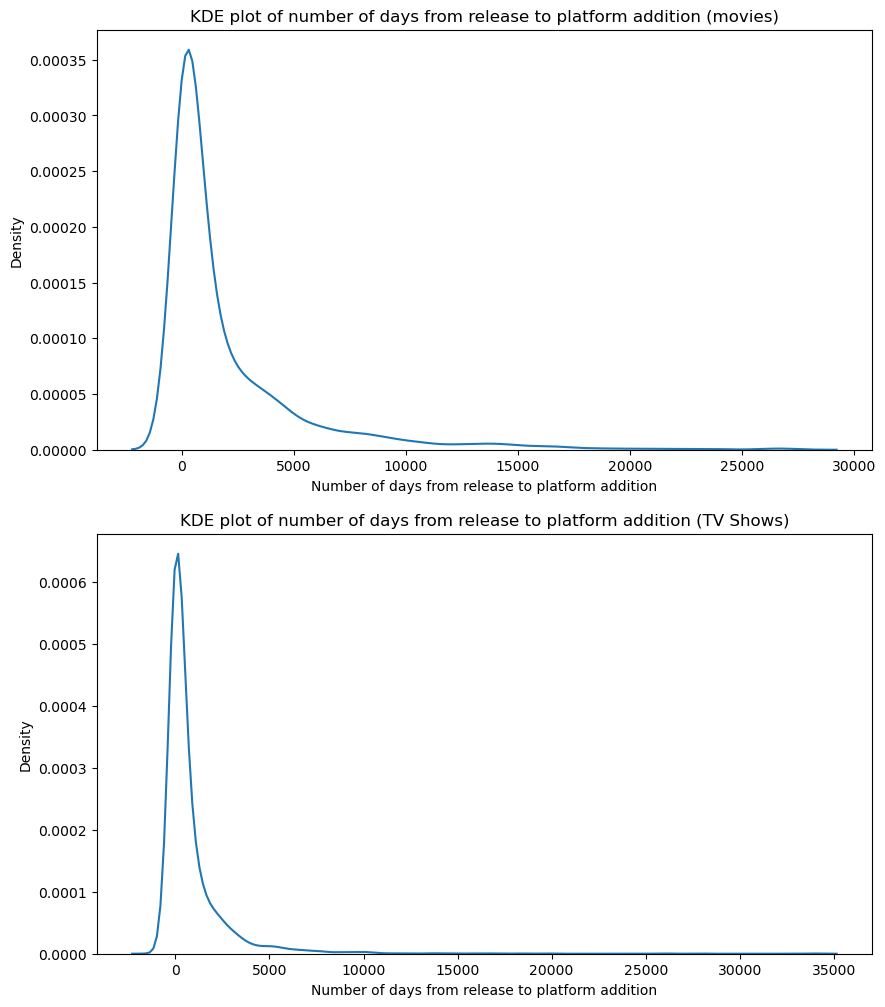

In [113]:
#KDE plots comparing the distribution of the number of days it takes a movie or TV show to be added to the 
#platform from its original release date
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
sns.kdeplot(x=data_subset[data_subset['type']=="Movie"].loc[:,'days_to_addition'])
plt.title("KDE plot of number of days from release to platform addition (movies)")
plt.xlabel("Number of days from release to platform addition")

plt.subplot(2,1,2)
sns.kdeplot(x=data_subset[data_subset['type']=="TV Show"].loc[:,'days_to_addition'])
plt.title("KDE plot of number of days from release to platform addition (TV Shows)")
plt.xlabel("Number of days from release to platform addition")

plt.show()

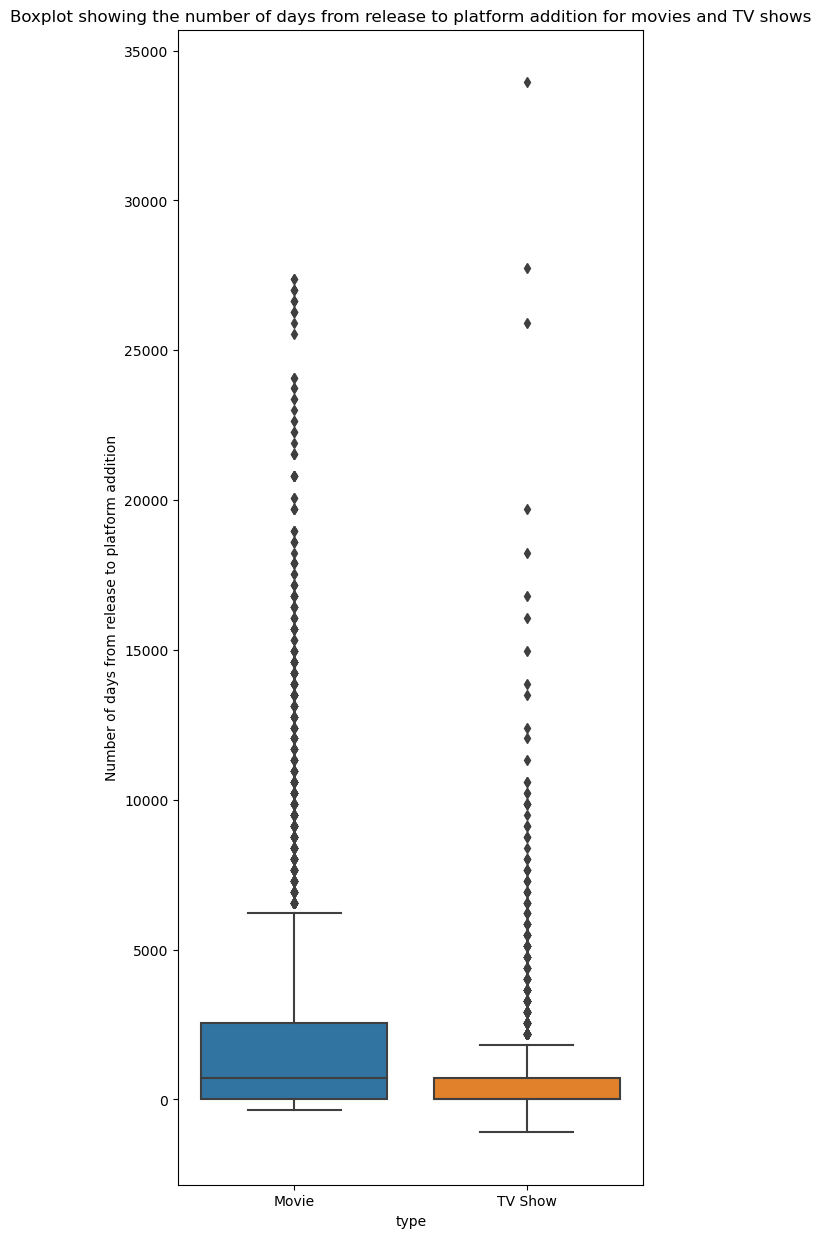

In [114]:
#Comparative boxplots of the number of days it takes a movie or TV show to be added to the 
#platform from its original release date
plt.figure(figsize=(6,15))
sns.boxplot(x="type",y="days_to_addition",data=data_subset)
plt.title("Boxplot showing the number of days from release to platform addition for movies and TV shows")
plt.ylabel("Number of days from release to platform addition")
plt.show()

<ins>Observations</ins>
- All three plots (histogram, KDE plot and boxplot) indicate that the distribution of the number of days it takes a movie or TV show to be added to the platform from its original release date is right-skewed.
- A majority movies and TV shows are released directly on the OTT platform.
- There are a few negative values present, indicating that some movies may have been released on Netflix prior to their theatrical/cable TV release.
- Outliers are present towards the upper end of the distribution. This could be attributed to older content which were created prior to the digital streaming age.

<ins>Actionable insights</ins>
- There is a huge advantage of gaining immediate distribution rights for movies and TV shows as it helps capture audiences during the initial period where hype around a new release is maximum.
- The company must invest in original content as these can be relased directly on the platform without any delay.
- The company must acquire and promote old super hits content to help attract older customers to the platform.

---

## Bivariate/Multivariate Analysis

### Correlation analysis between numerical variables

In [115]:
data_subset2=data[['title','type','release_year', 'movie_length', 'show_seasons', 'year_added',
       'week_added']].drop_duplicates().reset_index().drop(columns='index')
data_subset2

,title,type,release_year,movie_length,show_seasons,year_added,week_added
0,Dick Johnson Is Dead,Movie,2020,90,0,2021,38
1,Blood & Water,TV Show,2021,0,2,2021,38
2,Ganglands,TV Show,2021,0,1,2021,38
3,Jailbirds New Orleans,TV Show,2021,0,1,2021,38
4,Kota Factory,TV Show,2021,0,2,2021,38
...,...,...,...,...,...,...,...
8792,Zodiac,Movie,2007,158,0,2019,47
8793,Zombie Dumb,TV Show,2018,0,2,2019,27
8794,Zombieland,Movie,2009,88,0,2019,44
8795,Zoom,Movie,2006,88,0,2020,2


In [116]:
data_subset2.corr()

,release_year,movie_length,show_seasons,year_added,week_added
release_year,1.000000,-0.248774,0.104084,0.111531,0.001210
movie_length,-0.248774,1.000000,-0.609368,0.028934,-0.058965
show_seasons,0.104084,-0.609368,1.000000,0.032147,0.030506
year_added,0.111531,0.028934,0.032147,1.000000,-0.155668
week_added,0.001210,-0.058965,0.030506,-0.155668,1.000000


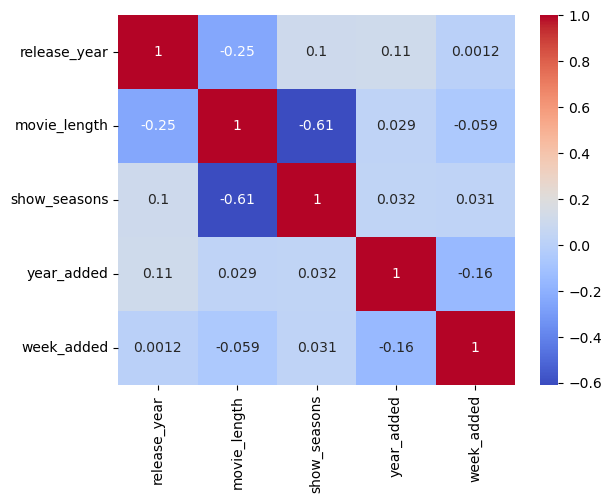

In [117]:
#Get a heatmap showing the correlations between numerical columns in the data
sns.heatmap(data_subset2.corr(),cmap="coolwarm",annot=True)
plt.show()

<ins>Observations</ins>
- There does not appear to be any significant correlations between any two numerical variables in this data set.
- The apparently high value of -0.62 between 'movie_length' and 'show_seasons' is because when one of them has a non-zero value, the other one is 0 because a single title can be either a movie or TV show. Hence, this value can be disregarded.

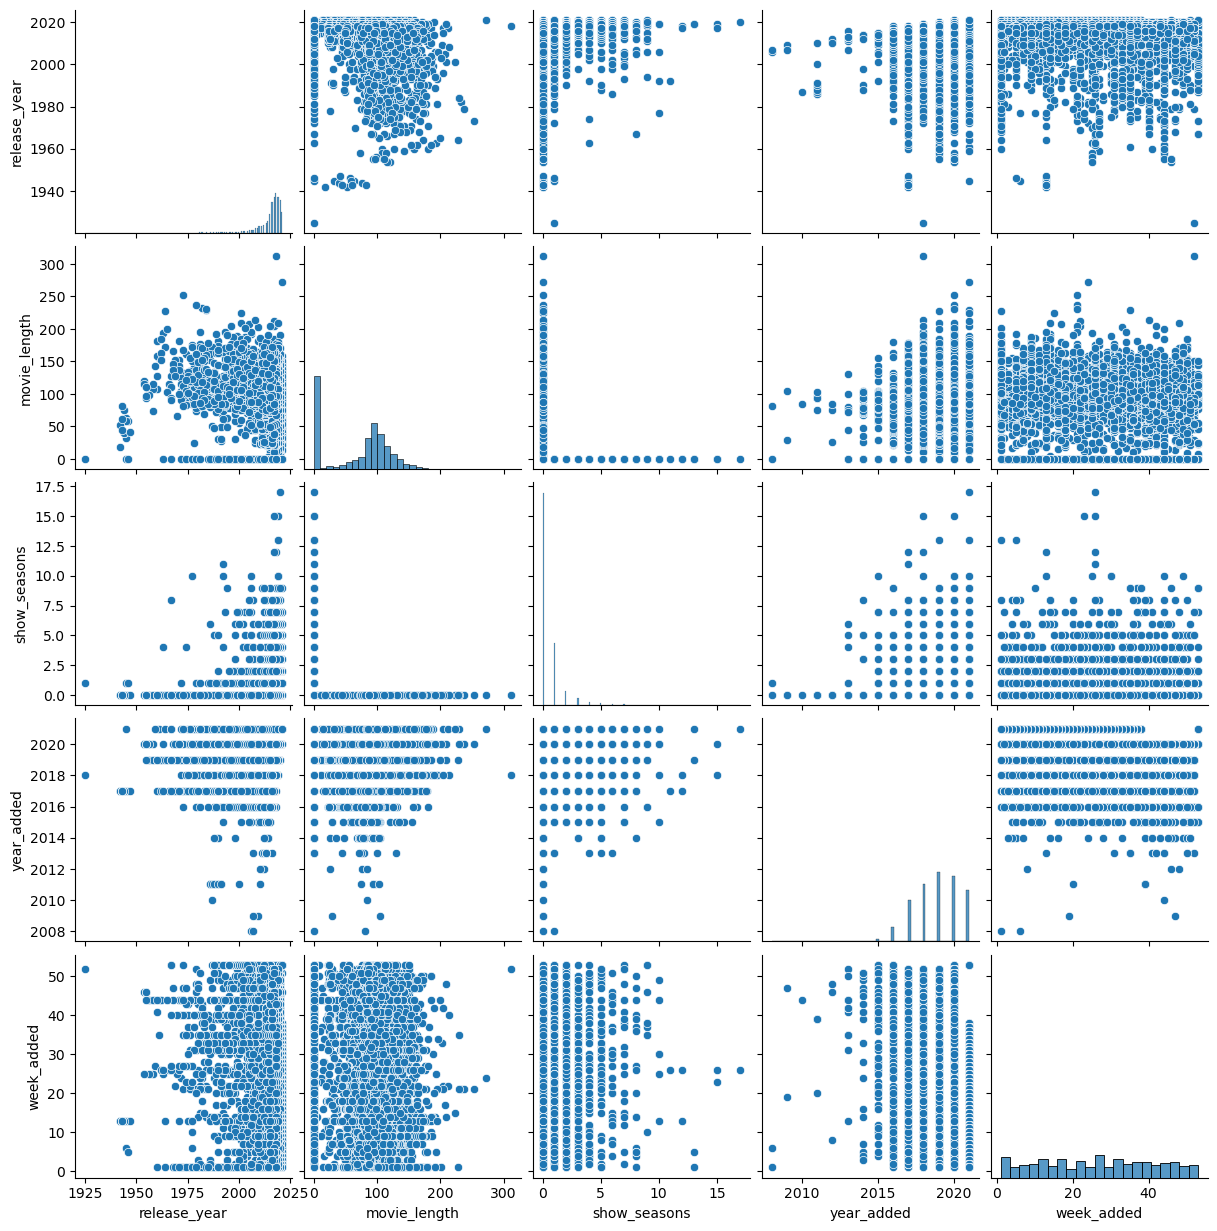

In [118]:
#Pairplot of numeric columns
sns.pairplot(data=data_subset2)
plt.show()

<ins>Observations</ins>
- The scatterplots between numerical variables does not show any identifiable pattern or trend in the scattering of points. This means that there are no significant correlations present in the data.
- The histograms indicate : 
    - a left-skewed distribution for 'release_year' variable is explained by the fact that Netflix's business has grown rapidly in recent years after an initial period of slow growth.
    - a fairly symmetrical distribution for the 'movie_length' with outliers on both sides indicating the Netflix has a wide array of movie content ranging from short films to long duration movies.
    - a right-skewed distribution for the 'show_seasons' is expected as only a few shows make it past the first one or two seasons.
    - a left-skewed distribution for 'year_added' variable for similar reasons as the the 'release_year' data.
    - a multimodal distribution for the 'week_added' variable indicates that while there is no distinct bias towards one side of the distribution, there are different weeks throughout the year where new content additions rise and fall.
    
<ins>Actionable insights</ins>
- While growth in content has increased in recent years, it is important for the company to prioritize quality over quantity and channelizing investments into new projects.
- Additional market research must be carried out to determine the reasons for most shows not running for multiple seasons. Efforts must be made to produce content with the potential to establish a fan base spanning long periods.

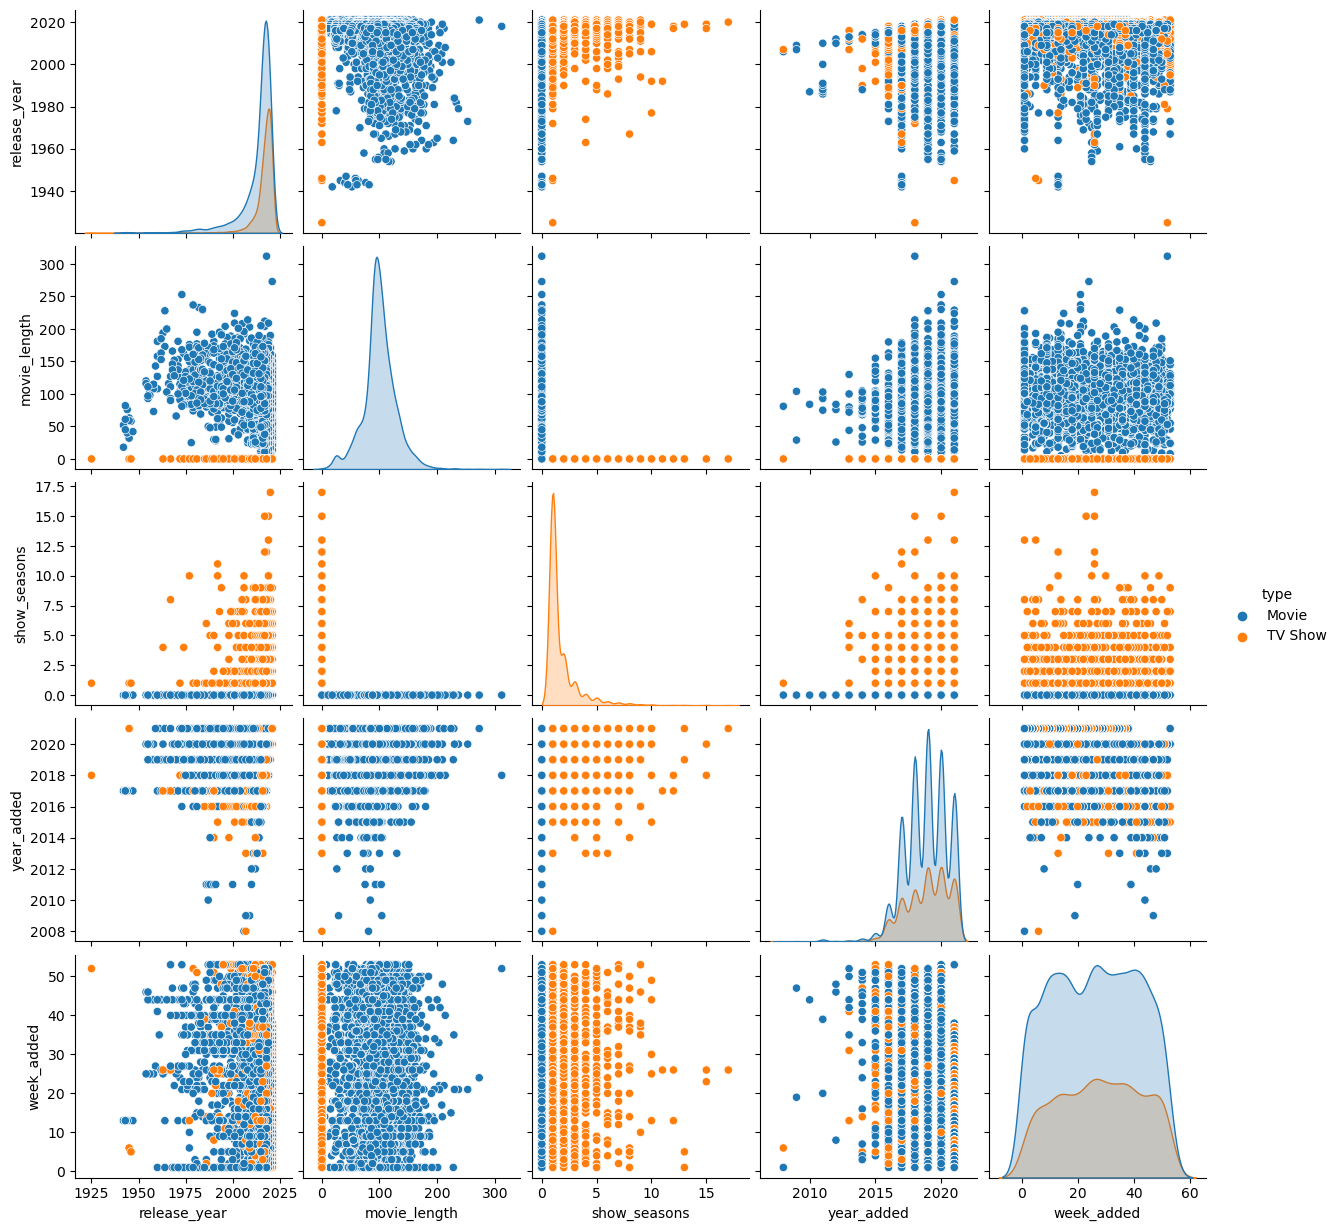

In [119]:
#Pairplot of numeric columns seperated by type
sns.pairplot(data=data_subset2,hue='type')
plt.show()

<ins>Observations</ins>
- There is no striking pattern or trend created by the scattering of points for either movies or TV shows.
- The density plots for the different numerical variables provide similar insights as decoded by their corresponding histograms in the previous plot. 

### Analyzing the growth of content on Netflix over the years

In [120]:
data_subset1=data.loc[:,["title","type","year_added","country"]].drop_duplicates().reset_index().drop(columns="index")
data_subset1

,title,type,year_added,country
0,Dick Johnson Is Dead,Movie,2021,United States
1,Blood & Water,TV Show,2021,South Africa
2,Ganglands,TV Show,2021,Unknown Country
3,Jailbirds New Orleans,TV Show,2021,Unknown Country
4,Kota Factory,TV Show,2021,India
...,...,...,...,...
10830,Zodiac,Movie,2019,United States
10831,Zombie Dumb,TV Show,2019,Unknown Country
10832,Zombieland,Movie,2019,United States
10833,Zoom,Movie,2020,United States


In [121]:
movies_per_year=data_subset1[data_subset1["type"]=="Movie"].groupby("year_added")["title"].nunique()
movies_per_year

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: title, dtype: int64

In [122]:
tvshows_per_year=data[data["type"]=="TV Show"].groupby("year_added")["title"].nunique()
tvshows_per_year=tvshows_per_year.append(pd.Series(data=[0,0,0,0],index=[2009,2010,2011,2012])).sort_index()
tvshows_per_year

2008      1
2009      0
2010      0
2011      0
2012      0
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
dtype: int64

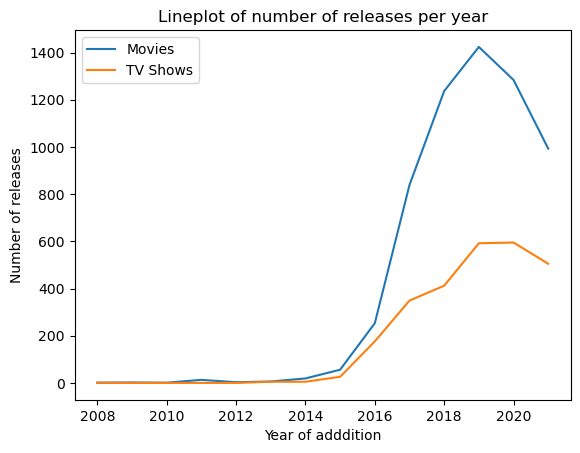

In [123]:
plt.title('Lineplot of number of releases per year')
sns.lineplot(x=movies_per_year.index,y=movies_per_year.values,label='Movies')
sns.lineplot(x=tvshows_per_year.index,y=tvshows_per_year.values,label='TV Shows')
plt.xlabel('Year of adddition')
plt.ylabel('Number of releases')
plt.legend()
plt.show()

<ins>Observations</ins>
- The line plot indicates that the number of titles (movies and TV shows) added to Netflix was flat in the initial years.
- Around the year 2015 is when there was an explosion in the number of new movies and TV shows released onto the platform, preluding a phase of exponential growth.
- The number of new additions peaked in 2019 followed by a sharp fall in 2020, possibly due to the COVID-19 pandemic when production of several movies and shows was suspended.
- Due to lower budget and resources, the order of magnitude of the movies curve is much higher than that of TV shows.

<ins>Actionable insights</ins>
- The company must assess the risks from competitors as the digital steaming space has a wide array of players.
- The platform must analyze viewership figures to make informed investments in creating and acquiring popular content which has the best chance of generating revenue.
- The company must explore new markets to broaden its subscriber base.
- It must focus on enhancing the quality, quantity and diversity of content available on the platform to attract new customers and retain existing ones.

---
---